In [2]:
import pandas as pd

import numpy as np #scientific computing
import itertools
import seaborn as sn

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import scikitplot as skplt 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import statsmodels.api as sm

from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from collections import Counter

import time

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix



#add all necessary libraries here

## 1. Load data ##

In [3]:
#import the data into a Pandas dataframe and show it
df = pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## 2. Data exploration ##

In [4]:
df.shape

(396030, 27)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
keys, counts = np.unique(df.loan_status, return_counts=True)
for k, c in zip(keys, counts): 
    print("credit status: " + str(k) + " count: " + str(c))

credit status: Charged Off count: 77673
credit status: Fully Paid count: 318357


Charged Off count: 77673
and Fully Paid count: 318357

## 3.	Data visualization ##

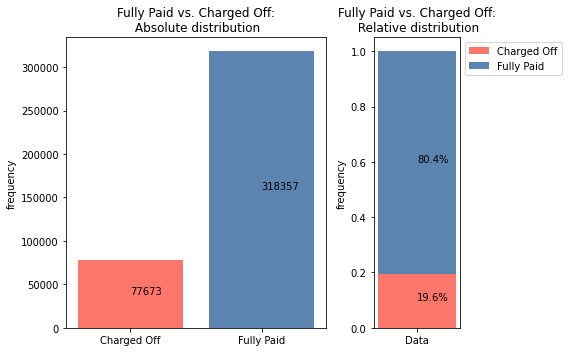

In [8]:
# Fully Paid vs. Charged Off 
keys, counts = np.unique(df.loan_status, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Charged Off', 'Fully Paid'], counts, color=['#FC766AFF','#5B84B1FF']) #left bar plot
ax0 = plt.title('Fully Paid vs. Charged Off:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['Charged Off'], counts[0]/2, counts[0]) #add text box with count of Charged Off cases
ax0 = plt.text(['Fully Paid'], counts[1]/2, counts[1]) #add text box with count of Fully Paid cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='Charged Off', color=['#FC766AFF'])
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='Fully Paid', color=['#5B84B1FF'])
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Fully Paid vs. Charged Off:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

Default loans = 19,6%

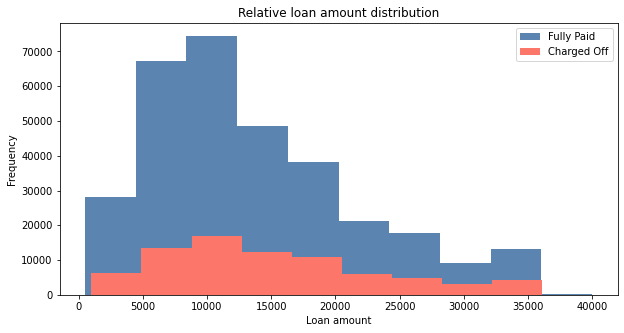

In [9]:
# Loan amount and loan status
ax5 = df['loan_amnt'].loc[df['loan_status'] == 'Fully Paid'].plot.hist(bins=10, label='Fully Paid', figsize = (10,5), color=['#5B84B1FF'])
ax5 = df['loan_amnt'].loc[df['loan_status'] == 'Charged Off'].plot.hist(bins=10, label='Charged Off', color=['#FC766AFF'])
ax5.set_xlabel('Loan amount')
ax5.set_title('Relative loan amount distribution')
ax5.legend();

Text(0.5, 1.0, 'Distribution of loan amount by loan status')

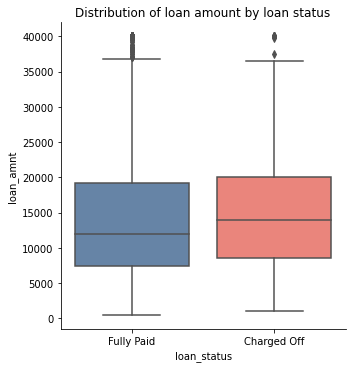

In [10]:
ax3 = sn.catplot(data=df, x="loan_status", y="loan_amnt", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of loan amount by loan status')

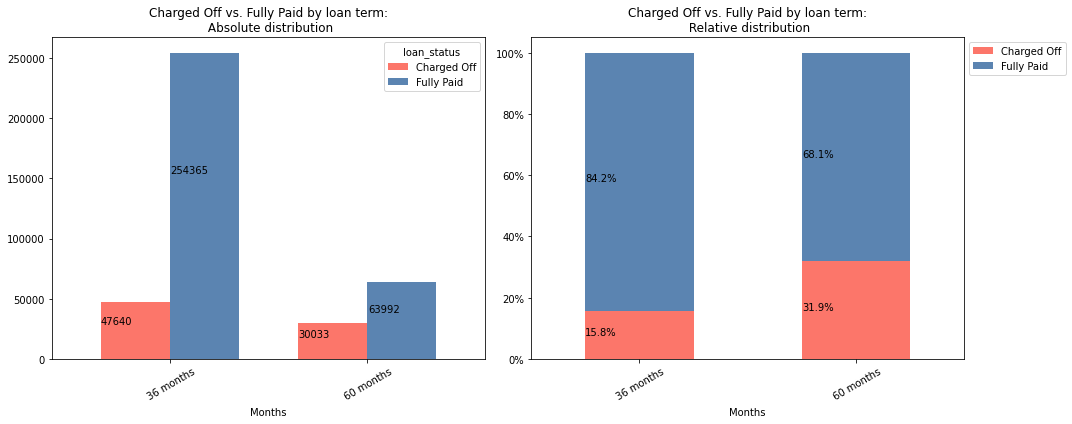

In [11]:
# loan term and loan status
fig = plt.figure(figsize=(15, 6)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['term', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by loan term:\n Absolute distribution') 
ax1.set_xlabel('Months')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['term', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by loan term:\n Relative distribution') 
ax2.set_xlabel('Months')
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

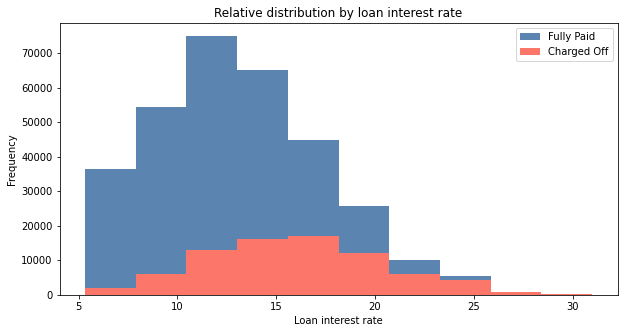

In [12]:
# interest rate and loan status
ax = df['int_rate'].loc[df['loan_status'] == 'Fully Paid'].plot.hist(bins=10, label='Fully Paid', figsize = (10,5), color=['#5B84B1FF'])
ax = df['int_rate'].loc[df['loan_status'] == 'Charged Off'].plot.hist(bins=10, label='Charged Off', color=['#FC766AFF'])
ax.set_xlabel('Loan interest rate')
ax.set_title('Relative distribution by loan interest rate')
ax.legend();

Text(0.5, 1.0, 'Distribution of interest rate by loan status')

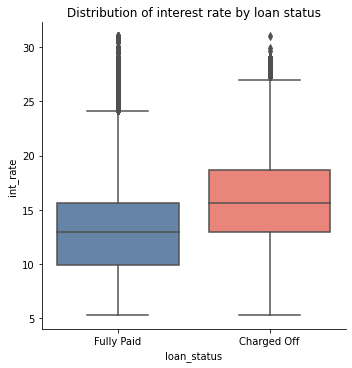

In [13]:
ax3 = sn.catplot(data=df, x="loan_status", y="int_rate", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of interest rate by loan status')

Text(0.5, 1.0, 'Distribution of interest rate by loan grade')

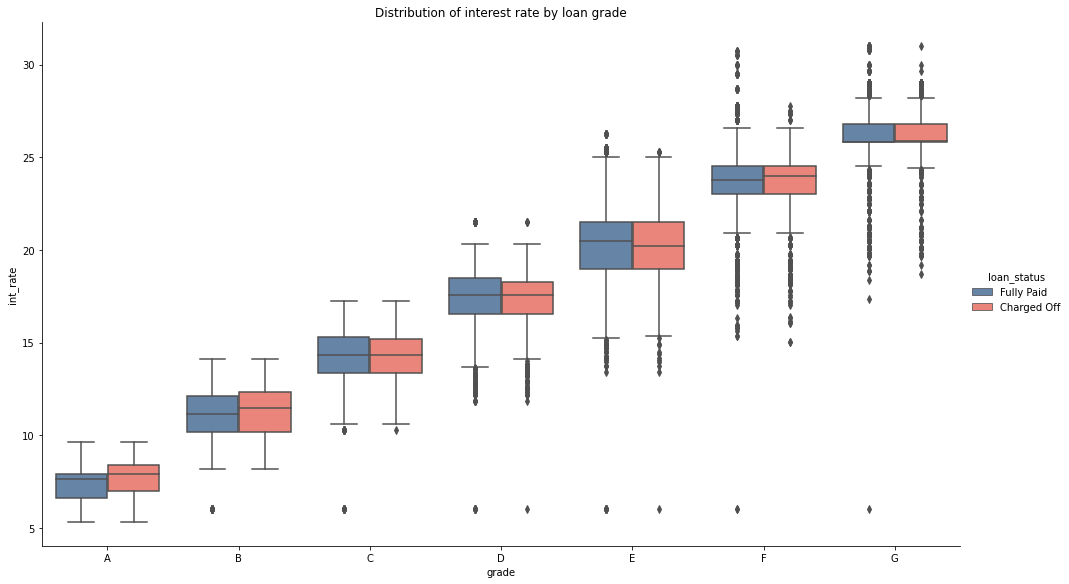

In [14]:
df = df.sort_values(by='grade')
ax4 = sn.catplot(data=df, x="grade", y="int_rate", hue="loan_status", kind="box", height=8, aspect=1.7, palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of interest rate by loan grade')

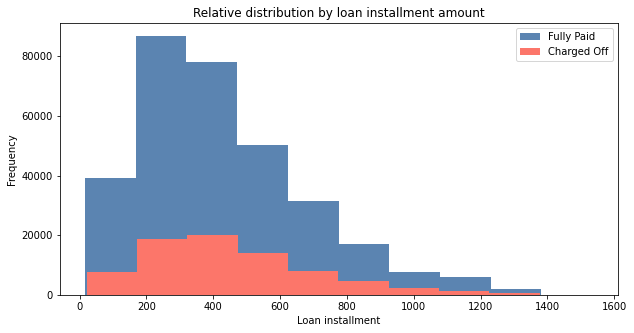

In [15]:
ax = df['installment'].loc[df['loan_status'] == 'Fully Paid'].plot.hist(bins=10, label='Fully Paid', figsize = (10,5), color=['#5B84B1FF'])
ax = df['installment'].loc[df['loan_status'] == 'Charged Off'].plot.hist(bins=10, label='Charged Off', color=['#FC766AFF'])
ax.set_xlabel('Loan installment')
ax.set_title('Relative distribution by loan installment amount')
ax.legend();

Text(0.5, 1.0, 'Distribution of loan unstallment by loan status')

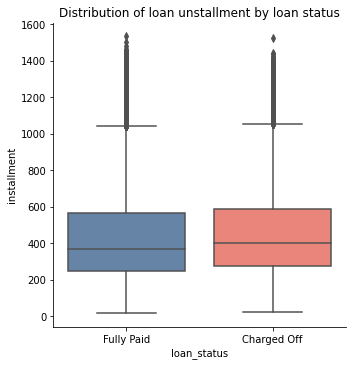

In [16]:
ax3 = sn.catplot(data=df, x="loan_status", y="installment", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of loan unstallment by loan status')

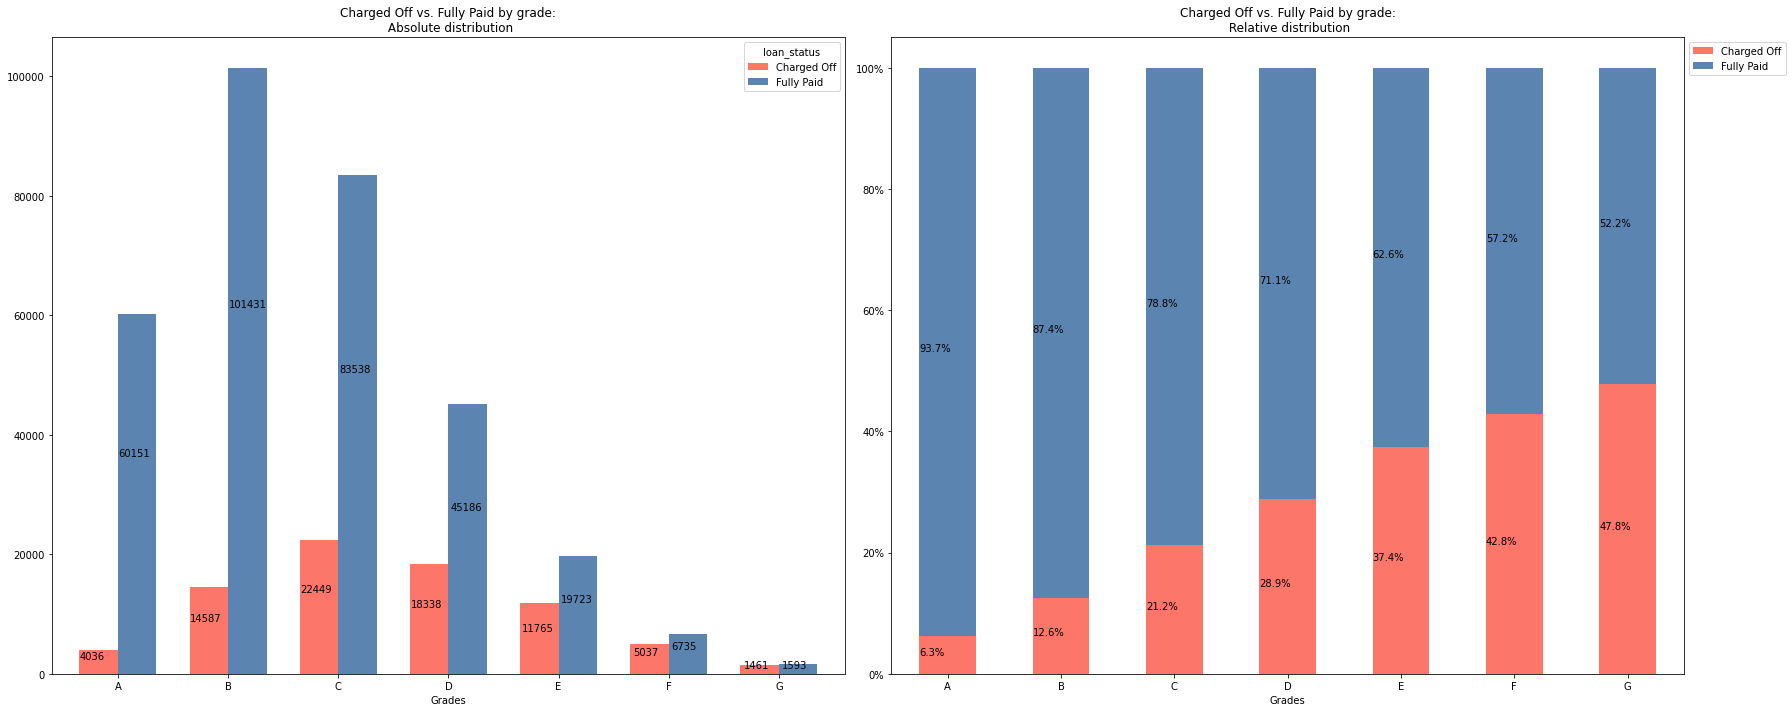

In [17]:
# grade and loan status
fig = plt.figure(figsize=(25, 10)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['grade', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by grade:\n Absolute distribution') 
ax1.set_xlabel('Grades')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['grade', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by grade:\n Relative distribution') 
ax2.set_xlabel('Grades')
#plot bar labels
for p, q in zip(ax2.patches[0:7], ax2.patches[7:14]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of loan amount by loan grade')

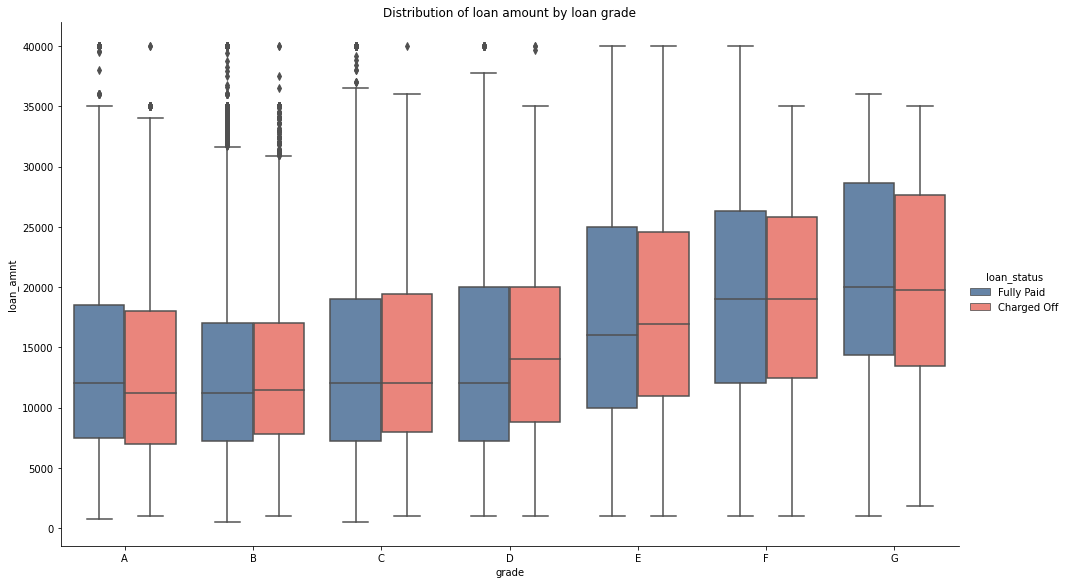

In [18]:
df = df.sort_values(by='grade')
ax4 = sn.catplot(data=df, x="grade", y="loan_amnt", hue="loan_status", kind="box", height=8, aspect=1.7, palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of loan amount by loan grade')

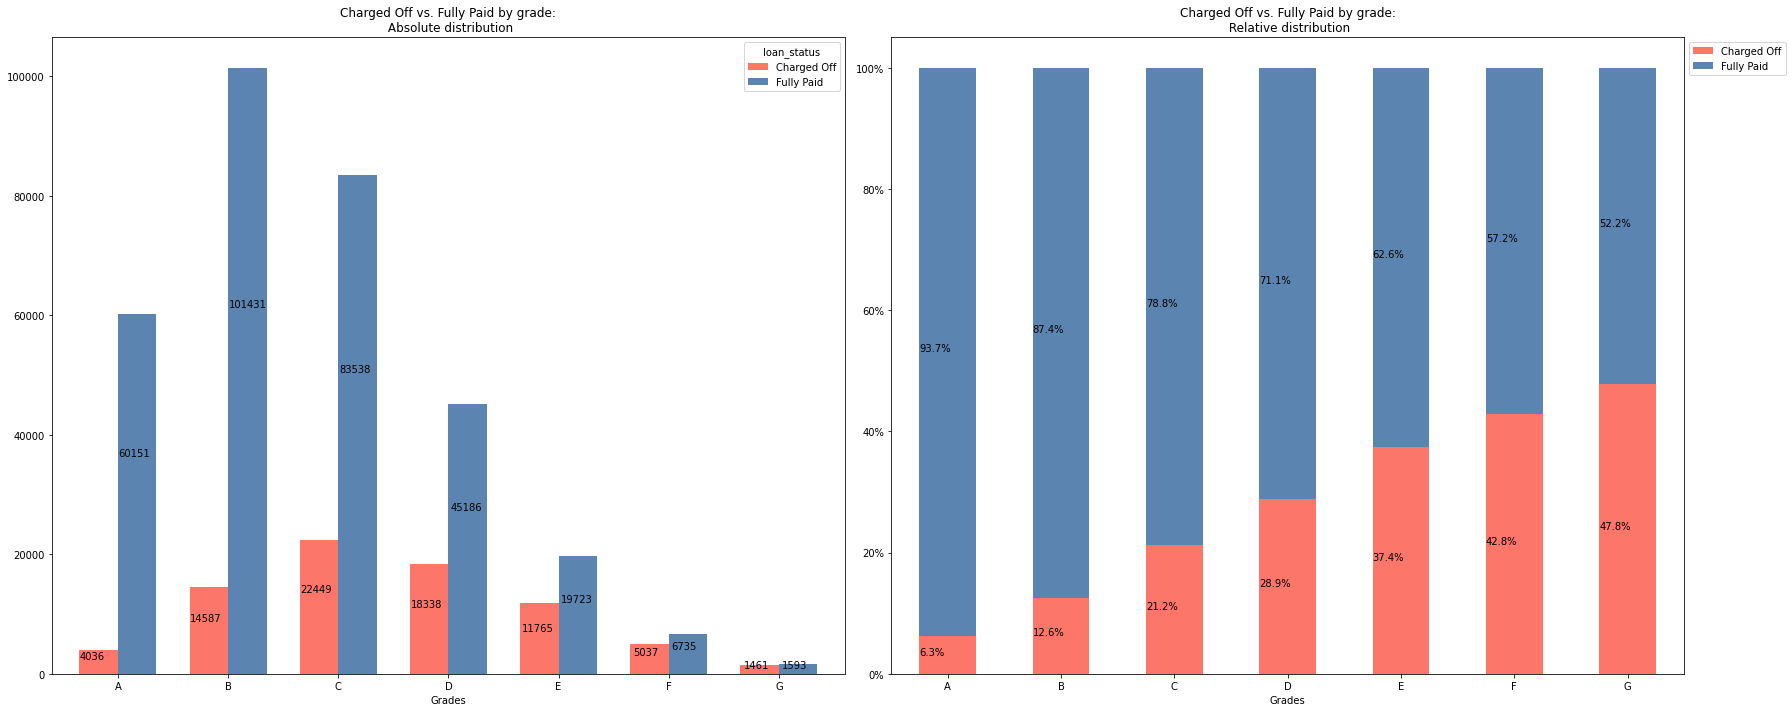

In [19]:
# grade and loan status
fig = plt.figure(figsize=(25, 10)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['grade', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by grade:\n Absolute distribution') 
ax1.set_xlabel('Grades')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['grade', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by grade:\n Relative distribution') 
ax2.set_xlabel('Grades')
#plot bar labels
for p, q in zip(ax2.patches[0:7], ax2.patches[7:14]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [20]:
df.groupby(['grade']).count()
# 349 716 observations in A-D 
# 396 030 in total
# 88% of all the observations are in grade A-D

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
grade,,,,,,,,,,,,,,,,,,,,,
A,64187,64187,64187,64187,64187,60481,61481,64187,64187,64187,...,64187,64187,64187,64172,64187,64187,64187,54270,64071,64187
B,116018,116018,116018,116018,116018,109280,110743,116018,116018,116018,...,116018,116018,116018,115973,116018,116018,116018,104460,115857,116018
C,105987,105987,105987,105987,105987,99913,100935,105987,105987,105987,...,105987,105987,105987,105907,105987,105987,105987,98417,105855,105987
D,63524,63524,63524,63524,63524,59630,60293,63524,63524,63524,...,63524,63524,63524,63448,63524,63524,63524,58620,63440,63524
E,31488,31488,31488,31488,31488,29749,30047,31488,31488,31488,...,31488,31488,31488,31453,31488,31488,31488,28891,31462,31488
F,11772,11772,11772,11772,11772,11167,11301,11772,11772,11772,...,11772,11772,11772,11754,11772,11772,11772,10804,11758,11772
G,3054,3054,3054,3054,3054,2883,2929,3054,3054,3054,...,3054,3054,3054,3047,3054,3054,3054,2773,3052,3054


In [21]:
pd.crosstab(df['grade'],df['loan_status'])



loan_status,Charged Off,Fully Paid
grade,,
A,4036,60151
B,14587,101431
C,22449,83538
D,18338,45186
E,11765,19723
F,5037,6735
G,1461,1593


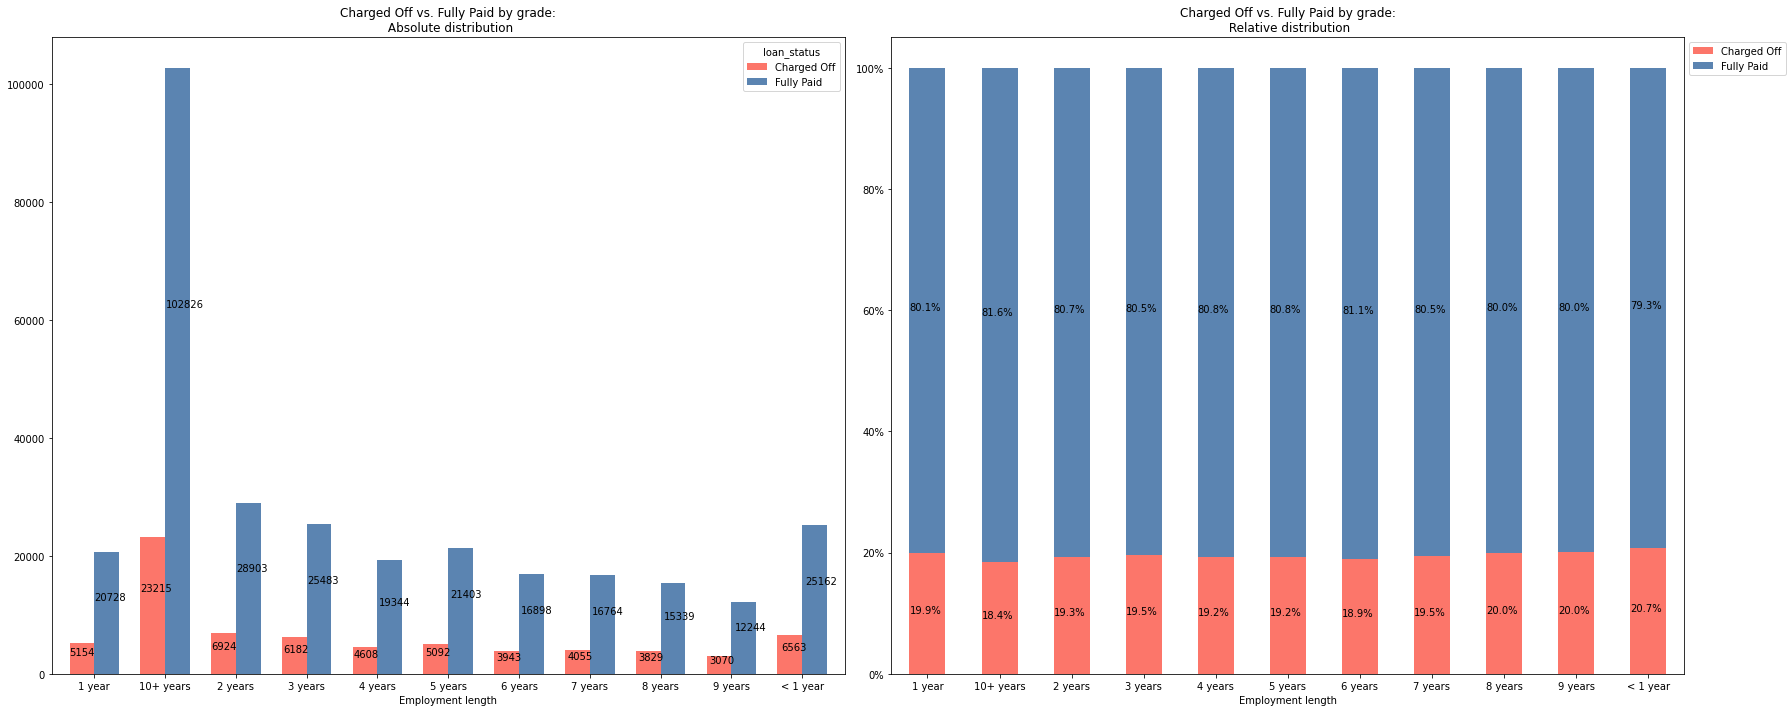

In [22]:
# emp_length and loan status

df = df.sort_values(by='emp_length')
fig = plt.figure(figsize=(25, 10)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['emp_length', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by grade:\n Absolute distribution') 
ax1.set_xlabel('Employment length')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['emp_length', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by grade:\n Relative distribution') 
ax2.set_xlabel('Employment length')
#plot bar labels
for p, q in zip(ax2.patches[0:11], ax2.patches[11:22]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of loan amount by loan sub_status')

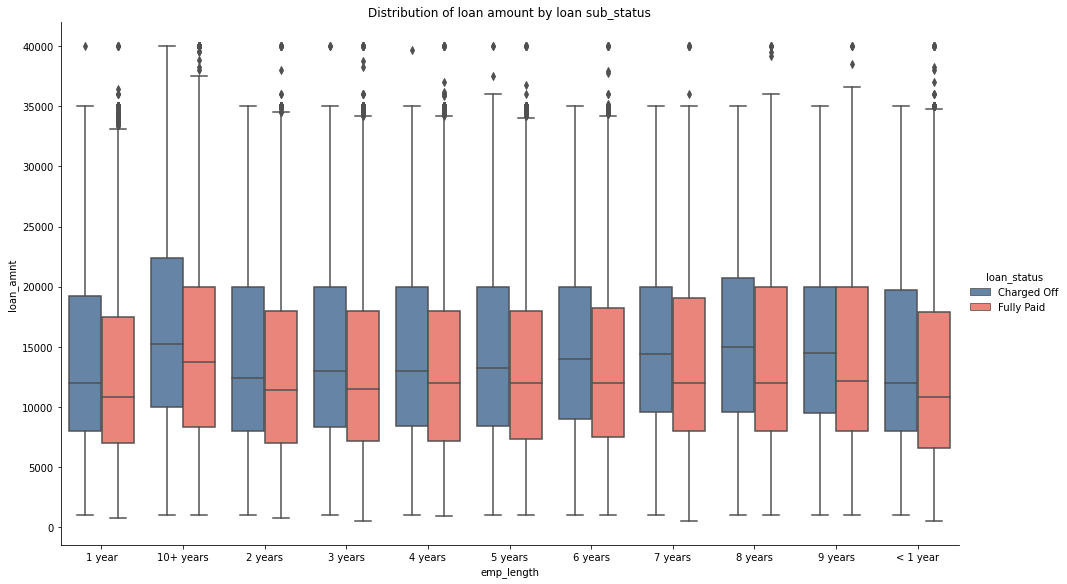

In [23]:
df = df.sort_values(by='emp_length')
ax4 = sn.catplot(data=df, x="emp_length", y="loan_amnt", hue="loan_status", kind="box", height=8, aspect=1.7, palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of loan amount by loan sub_status')

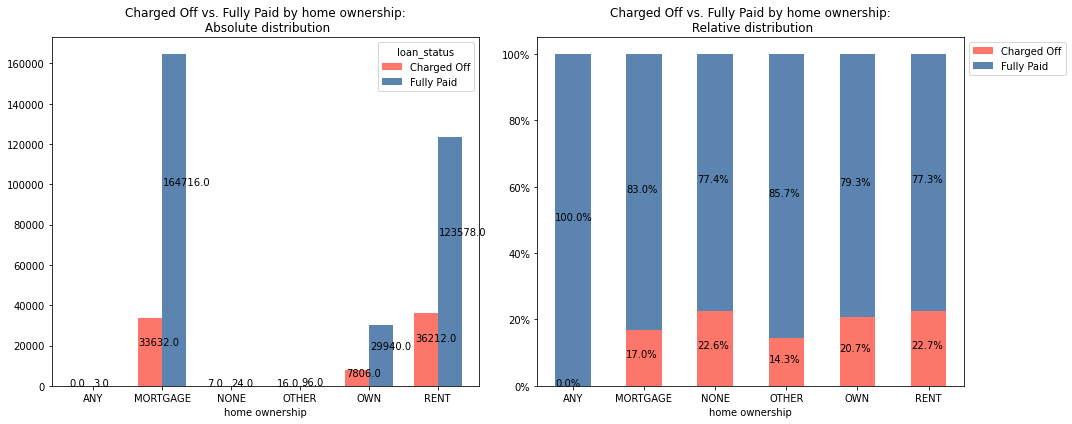

In [24]:
# home_ownership and loan status
fig = plt.figure(figsize=(15, 6)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['home_ownership', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by home ownership:\n Absolute distribution') 
ax1.set_xlabel('home ownership')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['home_ownership', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by home ownership:\n Relative distribution') 
ax2.set_xlabel('home ownership')
#plot bar labels
for p, q in zip(ax2.patches[0:6], ax2.patches[6:12]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [25]:
### change any to other

Text(0.5, 1.0, 'Distribution of loan income by loan status')

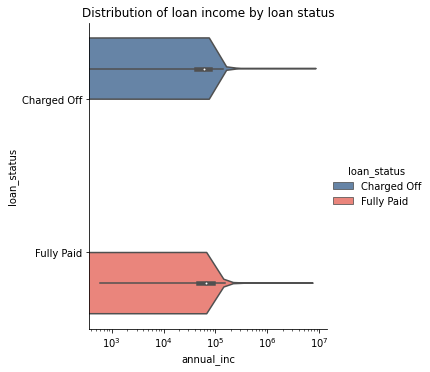

In [26]:
ax5 = sn.catplot(data=df, x="annual_inc", y="loan_status", hue="loan_status", kind="violin", palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.xscale('log')
plt.title('Distribution of loan income by loan status')

In [27]:
df.annual_inc.describe()
#standard scaler

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

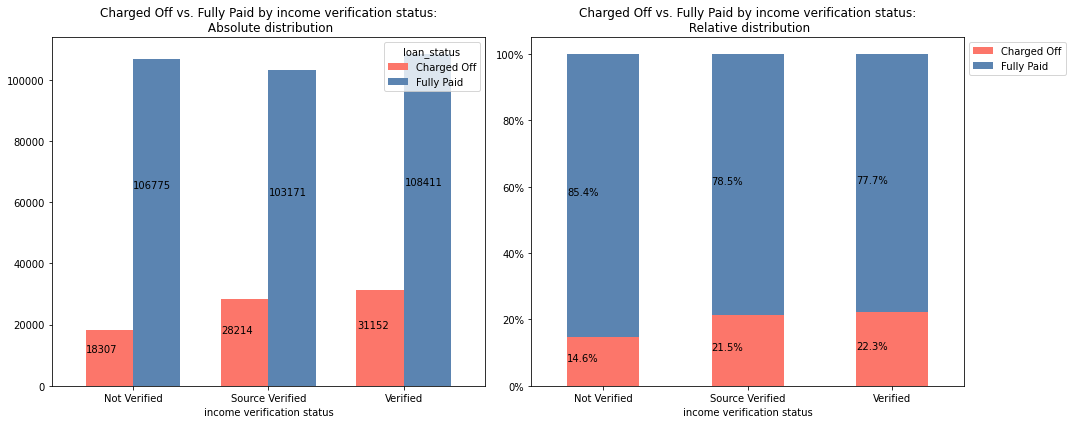

In [28]:
# home_ownership and loan status
fig = plt.figure(figsize=(15, 6)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['verification_status', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by income verification status:\n Absolute distribution') 
ax1.set_xlabel('income verification status')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['verification_status', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by income verification status:\n Relative distribution') 
ax2.set_xlabel('income verification status')
#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

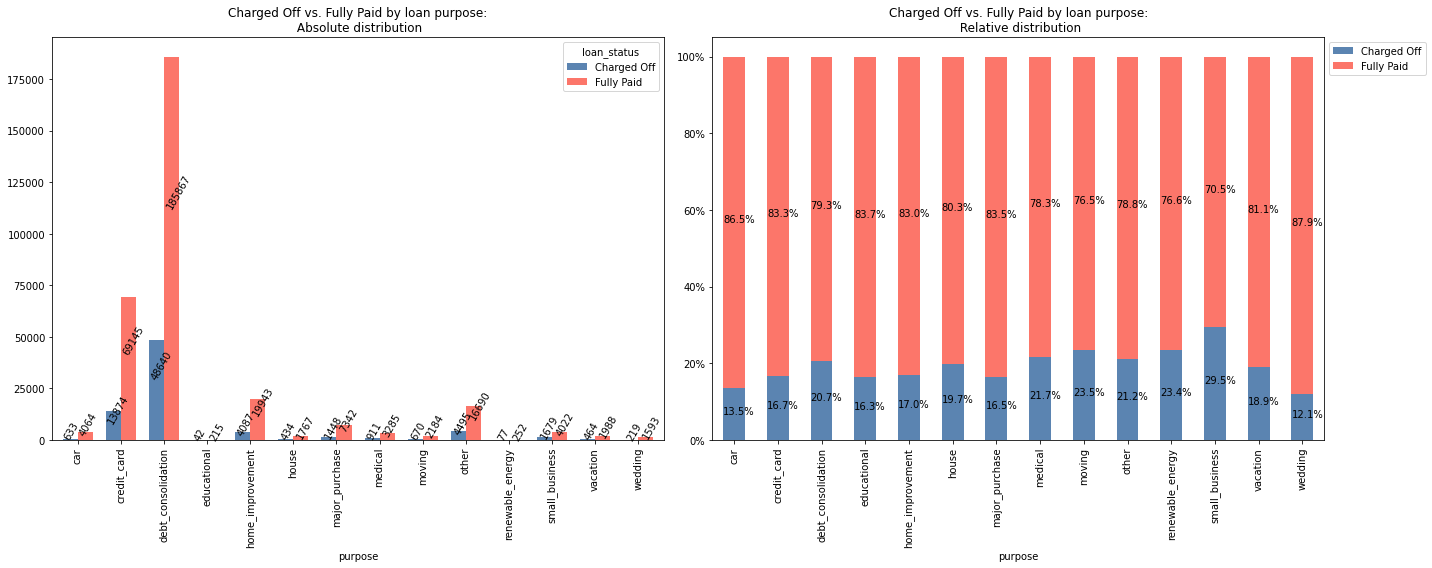

In [29]:
#default by loan purpose
fig = plt.figure(figsize=(20, 8)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack().plot.bar( rot=90, ax=plt.gca(), width=0.7, color=['#5B84B1FF','#FC766AFF'])
plt.title('Charged Off vs. Fully Paid by loan purpose:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605), rotation=60)

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['purpose', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=90, ax=plt.gca(), color=['#5B84B1FF','#FC766AFF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by loan purpose:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:14], ax2.patches[14:28]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

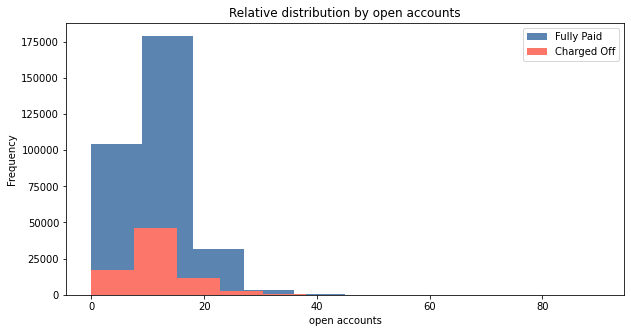

In [30]:
ax = df['open_acc'].loc[df['loan_status'] == 'Fully Paid'].plot.hist(bins=10, label='Fully Paid', figsize = (10,5), color=['#5B84B1FF'])
ax = df['open_acc'].loc[df['loan_status'] == 'Charged Off'].plot.hist(bins=10, label='Charged Off', color=['#FC766AFF'])
ax.set_xlabel('open accounts')
ax.set_title('Relative distribution by open accounts')
ax.legend();

Text(0.5, 1.0, 'Distribution of open account number by loan status')

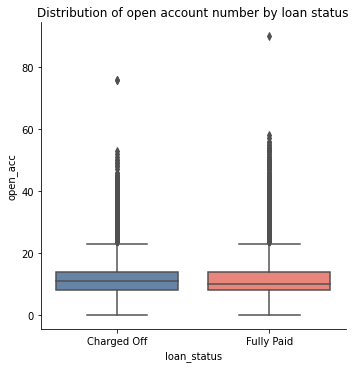

In [31]:
ax3 = sn.catplot(data=df, x="loan_status", y="open_acc", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.title('Distribution of open account number by loan status')

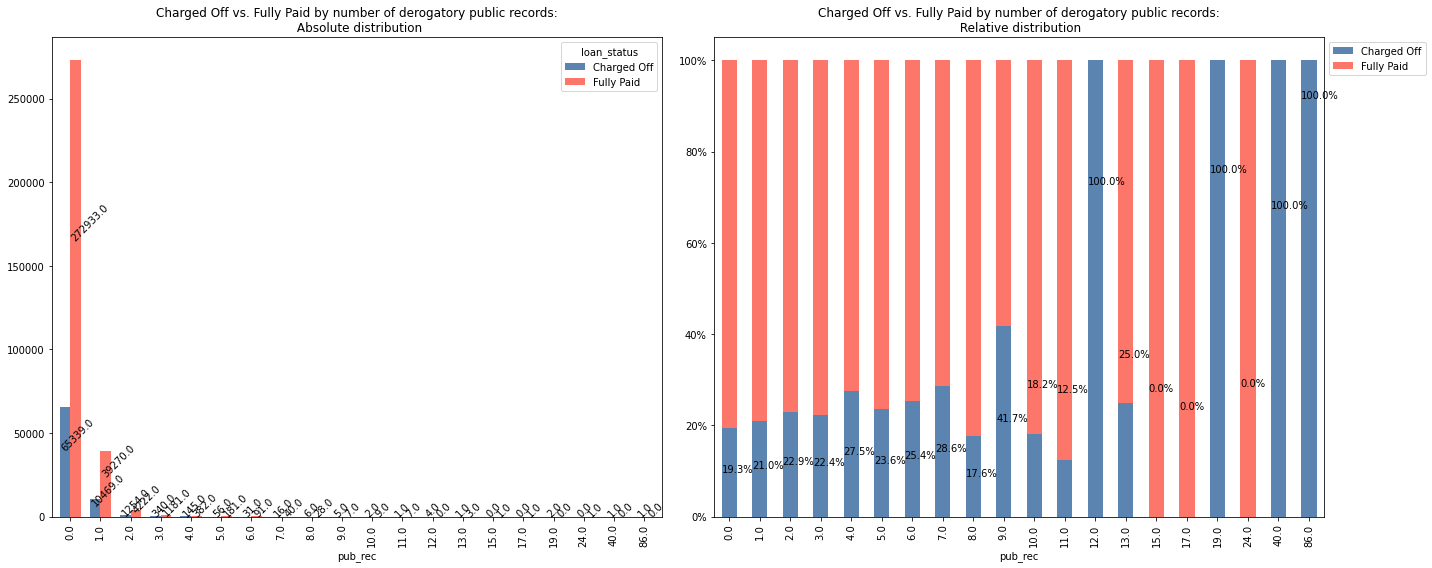

In [32]:
#default by loan purpose
fig = plt.figure(figsize=(20, 8)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['pub_rec', 'loan_status'])['loan_status'].count().unstack().plot.bar( rot=90, ax=plt.gca(), width=0.7, color=['#5B84B1FF','#FC766AFF'])
plt.title('Charged Off vs. Fully Paid by number of derogatory public records:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605), rotation=45)

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['pub_rec', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=90, ax=plt.gca(), color=['#5B84B1FF','#FC766AFF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by number of derogatory public records:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:10], ax2.patches[10:20]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

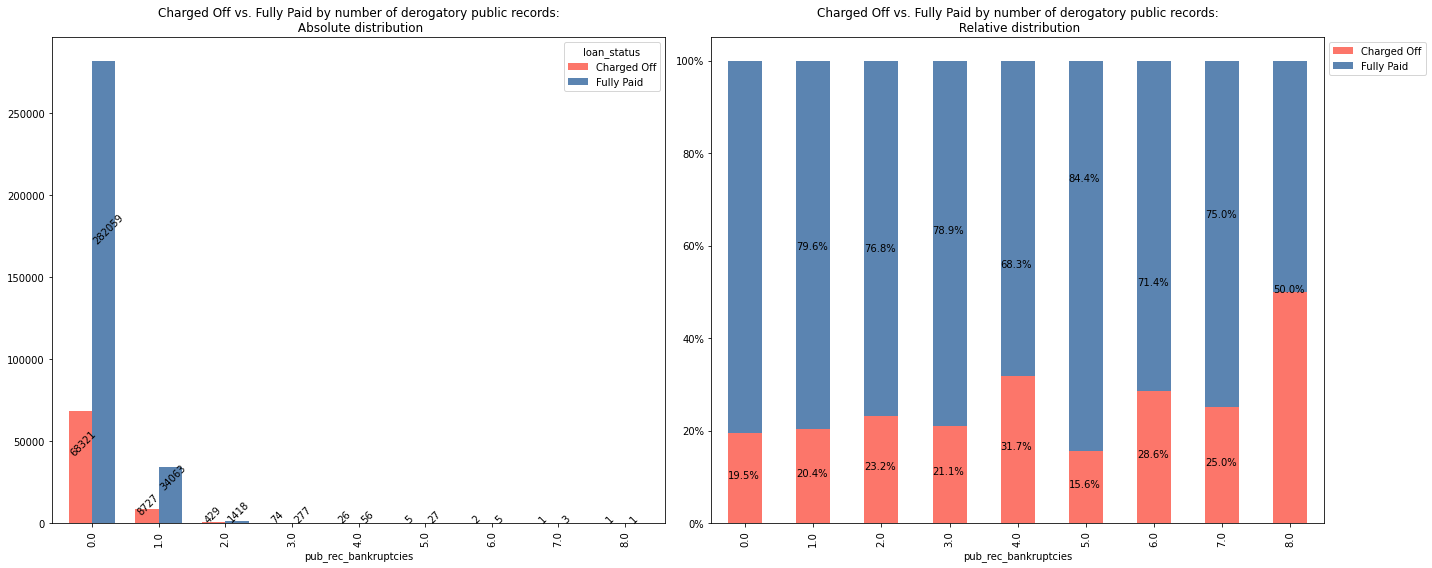

In [33]:
#default by loan purpose
fig = plt.figure(figsize=(20, 8)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['pub_rec_bankruptcies', 'loan_status'])['loan_status'].count().unstack().plot.bar( rot=90, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by number of derogatory public records:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605), rotation=45)

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['pub_rec_bankruptcies', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=90, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by number of derogatory public records:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:10], ax2.patches[10:20]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of total account number by loan status')

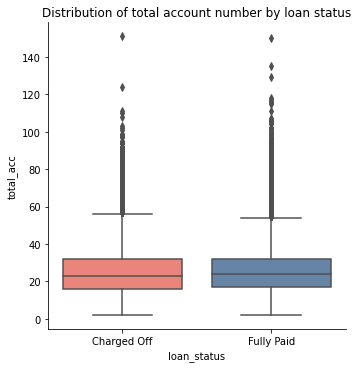

In [34]:
ax3 = sn.catplot(data=df, x="loan_status", y="total_acc", kind="box",  palette=sn.color_palette([ '#FC766AFF','#5B84B1FF']))
plt.title('Distribution of total account number by loan status')

Text(0.5, 1.0, 'Distribution of mortgage account number by loan status')

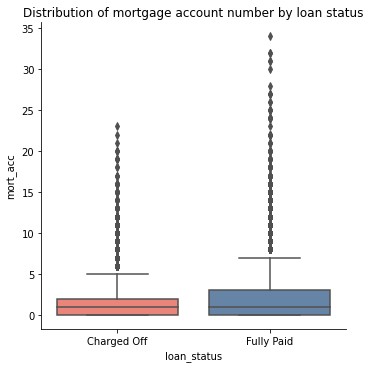

In [35]:
ax3 = sn.catplot(data=df, x="loan_status", y="mort_acc", kind="box",  palette=sn.color_palette(['#FC766AFF','#5B84B1FF']))
plt.title('Distribution of mortgage account number by loan status')

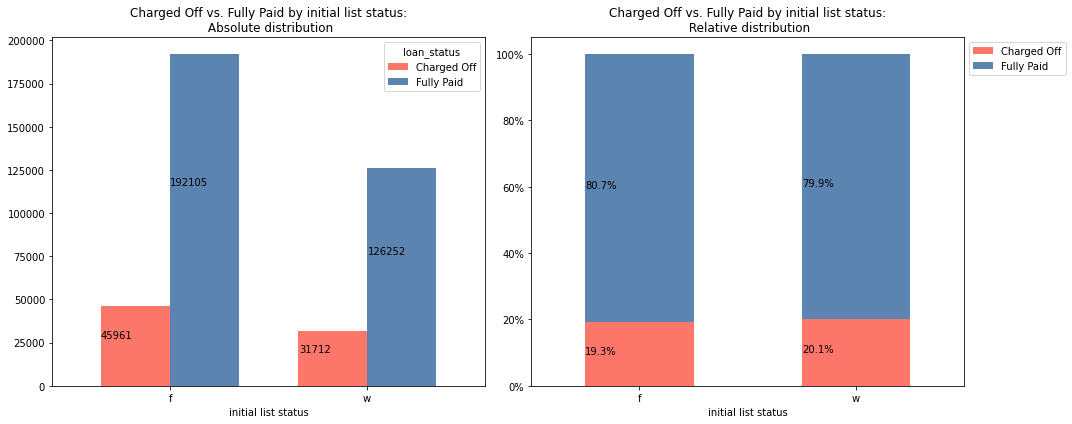

In [36]:
# loan term and loan status
fig = plt.figure(figsize=(15, 6)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['initial_list_status', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by initial list status:\n Absolute distribution') 
ax1.set_xlabel('initial list status')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['initial_list_status', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by initial list status:\n Relative distribution') 
ax2.set_xlabel('initial list status')
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

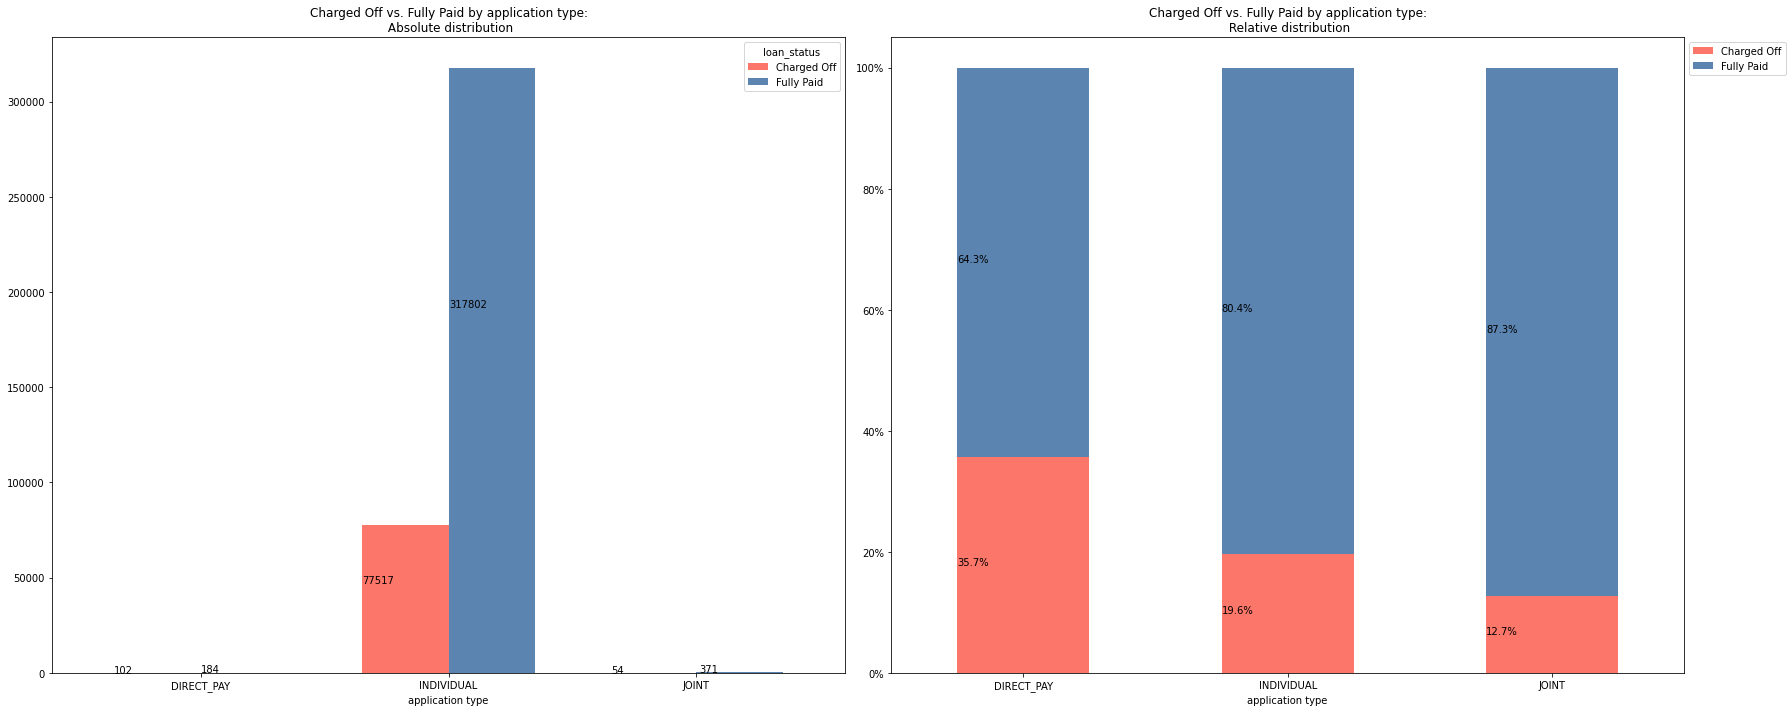

In [37]:
# loan term and loan status
fig = plt.figure(figsize=(25, 10)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df.groupby(['application_type', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by application type:\n Absolute distribution') 
ax1.set_xlabel('application type')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df.groupby(['application_type', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by application type:\n Relative distribution') 
ax2.set_xlabel('application type')
#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of credit revolving balance by loan status')

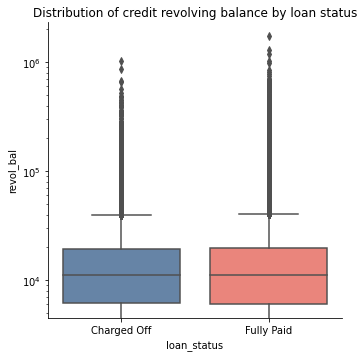

In [38]:
ax3 = sn.catplot(data=df, x="loan_status", y="revol_bal", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.yscale('log')
plt.title('Distribution of credit revolving balance by loan status')

Text(0.5, 1.0, 'Distribution of Revolving line utilization rate by loan status')

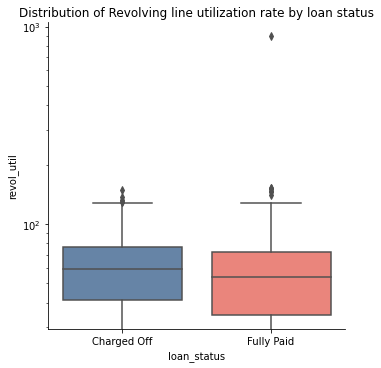

In [39]:
ax3 = sn.catplot(data=df, x="loan_status", y="revol_util", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
plt.yscale('log')
plt.title('Distribution of Revolving line utilization rate by loan status')

<AxesSubplot:>

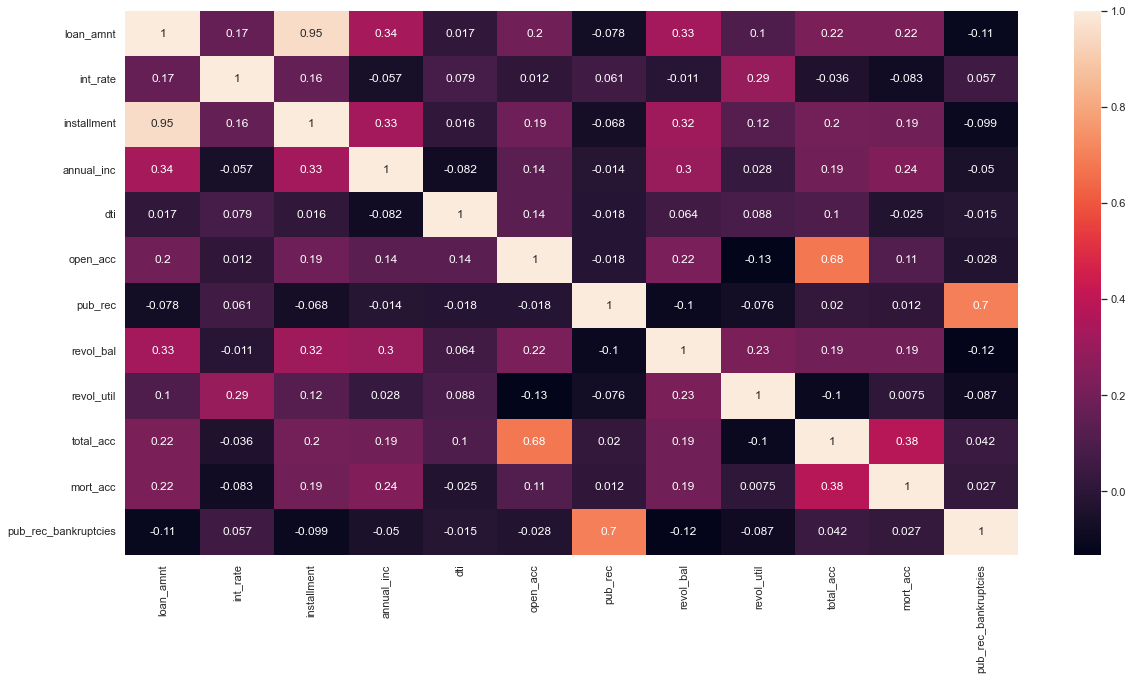

In [40]:
corr = df.corr()
sn.set(rc = {'figure.figsize':(20,10)})
sn.heatmap(df.corr(), annot=True)

In [41]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 4.	Data pre-processing ##

In [42]:
df2 = df.copy()

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 121239 to 239117
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 


In [44]:
df2['zipcode'] = df2['address'].apply(lambda address:address[-5:])


In [45]:
df2['zipcode'].describe()

count     396030
unique        10
top        70466
freq       56985
Name: zipcode, dtype: object

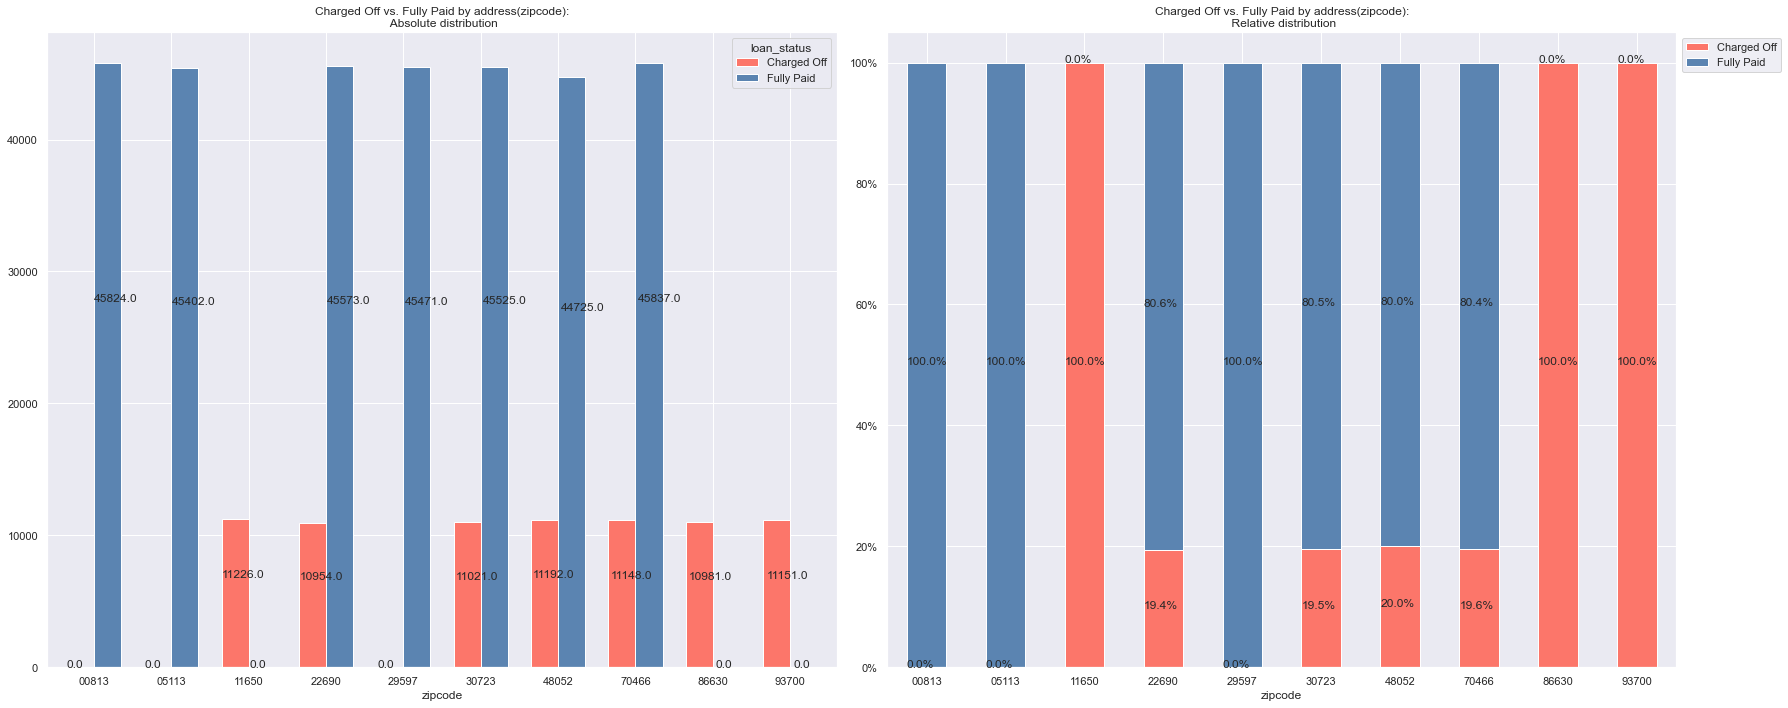

In [46]:
# grade and loan status
fig = plt.figure(figsize=(25, 10)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = df2.groupby(['zipcode', 'loan_status'])['loan_status'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7, color=['#FC766AFF','#5B84B1FF'])
plt.title('Charged Off vs. Fully Paid by address(zipcode):\n Absolute distribution') 
ax1.set_xlabel('zipcode')
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = df2.groupby(['zipcode', 'loan_status'])['loan_status'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca(), color=['#FC766AFF','#5B84B1FF'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Charged Off vs. Fully Paid by address(zipcode):\n Relative distribution') 
ax2.set_xlabel('zipcode')
#plot bar labels
for p, q in zip(ax2.patches[0:10], ax2.patches[10:20]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

In [47]:
df2.drop("emp_title", axis=1, inplace=True)
df2.drop("issue_d", axis=1, inplace=True)
df2.drop("title", axis=1, inplace=True)
df2.drop("earliest_cr_line", axis=1, inplace=True)
df2.drop("grade", axis=1, inplace=True)  #high multicolinearity detected
df2.drop("installment", axis=1, inplace=True) #high multicolinearity detected
#df2.drop("int_rate", axis=1, inplace=True) #high multicolinearity detected
df2.drop("open_acc", axis=1, inplace=True)
df2.drop("pub_rec", axis=1, inplace=True)
df2.drop("application_type", axis=1, inplace=True)
df2.drop("address", axis=1, inplace=True)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396030 entries, 121239 to 239117
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   sub_grade             396030 non-null  object 
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  object 
 10  dti                   396030 non-null  float64
 11  revol_bal             396030 non-null  float64
 12  revol_util            395754 non-null  float64
 13  total_acc             396030 non-null  float64
 14  initial_list_status   396030 non-null  object 


In [49]:
#df2 = df2[~df2.isnull().any(axis=1)]  #df2 without missing values. we didn't touch outliers
df2 = df2.dropna()

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340775 entries, 121239 to 295080
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             340775 non-null  float64
 1   term                  340775 non-null  object 
 2   int_rate              340775 non-null  float64
 3   sub_grade             340775 non-null  object 
 4   emp_length            340775 non-null  object 
 5   home_ownership        340775 non-null  object 
 6   annual_inc            340775 non-null  float64
 7   verification_status   340775 non-null  object 
 8   loan_status           340775 non-null  object 
 9   purpose               340775 non-null  object 
 10  dti                   340775 non-null  float64
 11  revol_bal             340775 non-null  float64
 12  revol_util            340775 non-null  float64
 13  total_acc             340775 non-null  float64
 14  initial_list_status   340775 non-null  object 


In [51]:
#delete the word "months" from the term column
df2['term'] = df2['term'].str[:3]
df2['term'] = df2['term'].astype(int)

In [52]:
#delete the word "years" from the emp_length column
df2['emp_length']= df2['emp_length'].replace(['< 1 year'], '0 year')  #0 means <1 year
df2['emp_length']= df2['emp_length'].replace(['10+ years'], '10 years') #10 means 10+ years
df2['emp_length'].describe()
df2[['emp_length', 'year']] = df2['emp_length'].str.split(' ', expand=True)
df2.drop("year", axis=1, inplace=True)
df2['emp_length'] = df2['emp_length'].astype(int)


In [53]:
#replace Fully Paid/Charged Off by 0/1
df2['loan_status']= df2['loan_status'].replace(['Fully Paid'], 0)
df2['loan_status']= df2['loan_status'].replace(['Charged Off'], 1)

In [54]:
df2['home_ownership']= df2['home_ownership'].replace(['ANY'], 'OTHER')
df2['home_ownership']= df2['home_ownership'].replace(['NONE'], 'OTHER')

In [55]:
df2.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,340775.000000,340775.000000,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,3.407750e+05,340775.000000,340775.000000,340775.000000,340775.000000
mean,14542.051647,41.775142,13.799587,6.033700,7.600978e+04,0.197397,17.692083,1.622684e+04,54.355115,25.834157,1.805282,0.125508
std,8401.453461,10.259213,4.509504,3.642044,6.210575e+04,0.398035,8.154273,2.114298e+04,23.971283,11.898221,2.143777,0.362347
min,1000.000000,36.000000,5.320000,0.000000,5.000000e+03,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.640000,3.000000,4.700000e+04,0.000000,11.600000,6.302000e+03,36.900000,17.000000,0.000000,0.000000
50%,12500.000000,36.000000,13.350000,6.000000,6.500000e+04,0.000000,17.220000,1.148700e+04,55.300000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.780000,10.000000,9.000000e+04,0.000000,23.390000,2.001550e+04,73.000000,33.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,10.000000,8.706582e+06,1.000000,380.530000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


340775 observations

In [56]:
df2 = df2[np.abs(df2.loan_amnt -df2.loan_amnt.mean()) <= (3*df.loan_amnt.std())] 
df2 = df2[np.abs(df2.annual_inc -df2.annual_inc.mean()) <= (3*df.annual_inc.std())] 
df2 = df2[np.abs(df2.dti-df2.dti.mean()) <= (3*df.dti.std())] 
df2 = df2[np.abs(df2.revol_bal -df2.revol_bal.mean()) <= (3*df.revol_bal.std())] 
df2 = df2[np.abs(df2.revol_util -df2.revol_util.mean()) <= (3*df.revol_util.std())] 
df2 = df2[np.abs(df2.total_acc -df2.total_acc.mean()) <= (3*df.total_acc.std())] 
df2 = df2[np.abs(df2.mort_acc -df2.mort_acc.mean()) <= (3*df.mort_acc.std())] 
df2 = df2[np.abs(df2.pub_rec_bankruptcies -df2.pub_rec_bankruptcies.mean()) <= (3*df.pub_rec_bankruptcies.std())] #326 011 left after

<AxesSubplot:>

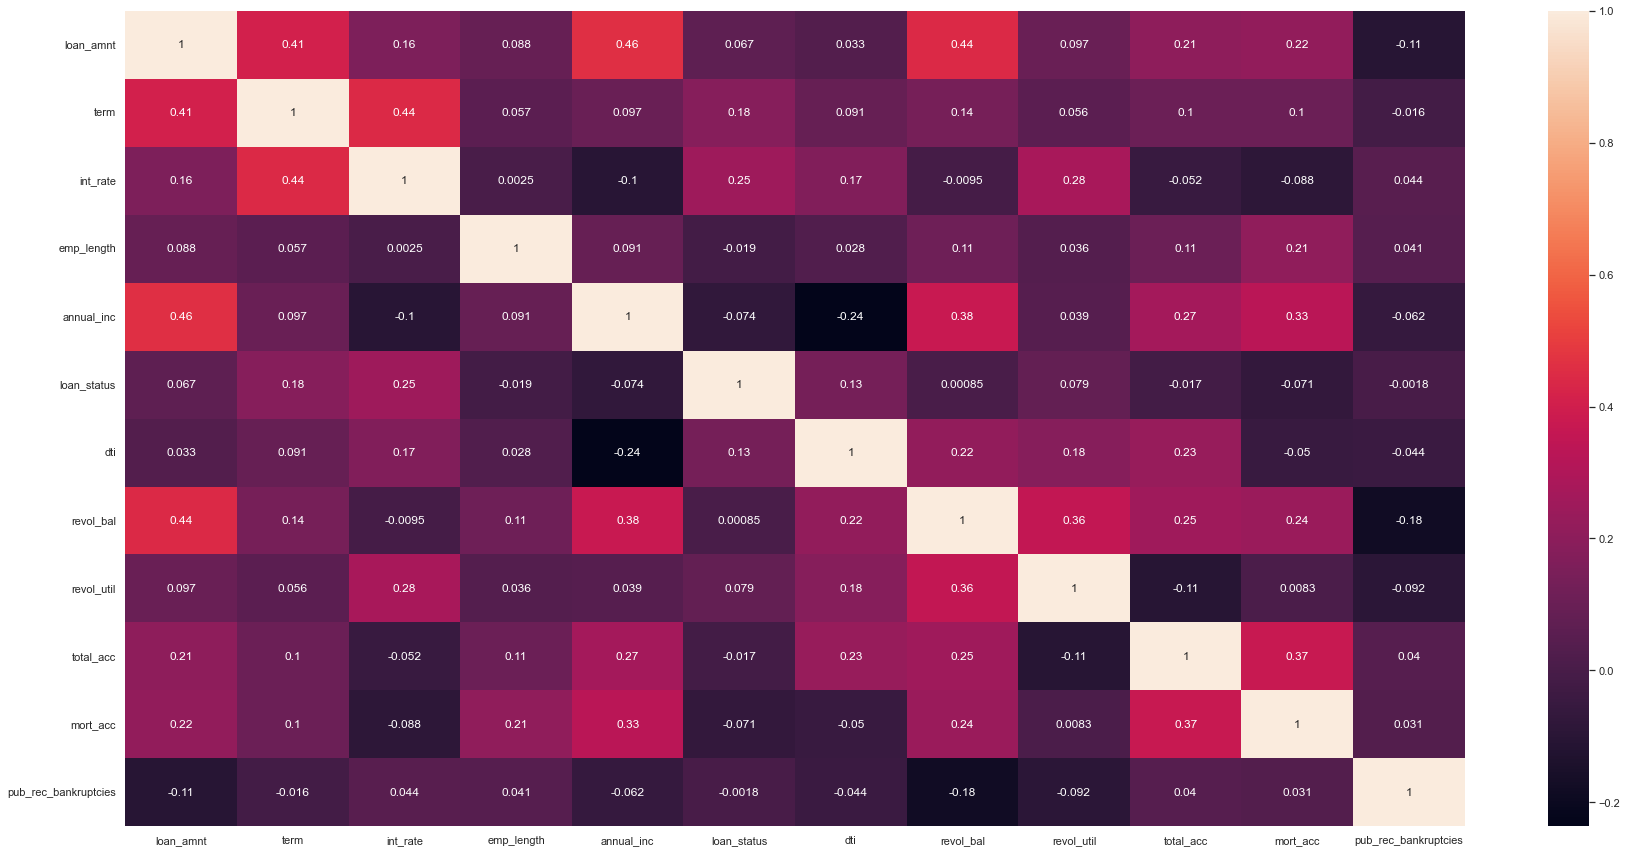

In [57]:
corr = df2.corr()
sn.set(rc = {'figure.figsize':(30,15)})
sn.heatmap(df2.corr(), annot=True)

In [58]:
df3 =df2
#df3= pd.get_dummies(df3, columns=["home_ownership",'verification_status','purpose','initial_list_status','application_type'])

df3 = pd.get_dummies(df3, columns=["home_ownership",'verification_status','purpose','initial_list_status','zipcode'], prefix=['home_ownership', 'verification_status', 'purpose','initial_list_status','zipcode'],
                      drop_first=True)

In [59]:
df3.describe()

,loan_amnt,term,int_rate,emp_length,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
count,326011.000000,326011.000000,326011.000000,326011.00000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,...,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000,326011.000000
mean,14311.381211,41.725574,13.809659,6.00869,72047.561912,0.199009,17.727619,14503.812586,54.414417,25.194981,...,0.439074,0.114100,0.028680,0.142431,0.114407,0.143035,0.141560,0.143685,0.028251,0.028585
std,8235.930463,10.228973,4.499035,3.64115,36434.931353,0.399255,8.095213,11719.301632,23.843485,11.115194,...,0.496275,0.317934,0.166906,0.349492,0.318306,0.350109,0.348598,0.350771,0.165688,0.166637
min,1000.000000,36.000000,5.320000,0.00000,5000.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.750000,3.00000,46000.000000,0.000000,11.660000,6241.000000,37.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.490000,6.00000,65000.000000,0.000000,17.260000,11290.000000,55.300000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,36.000000,16.780000,10.00000,90000.000000,0.000000,23.400000,19369.500000,73.000000,32.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39500.000000,60.000000,30.990000,10.00000,260000.000000,1.000000,68.560000,77608.000000,127.600000,61.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
#df3["grade_cat"] = df3["grade"].astype('category')
#df3["grade"] = df3["grade_cat"].cat.codes
#a=df3[['grade','grade_cat']]
#a=a.drop_duplicates()


In [61]:
#df3.drop("grade_cat", axis=1, inplace=True)

In [62]:
df3["sub_grade_cat"] = df3["sub_grade"].astype('category')
df3["sub_grade"] = df3["sub_grade_cat"].cat.codes
b=df3[['sub_grade','sub_grade_cat']]
b=b.drop_duplicates()


In [63]:
df3.drop("sub_grade_cat", axis=1, inplace=True)

In [64]:
df3.head().style

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,loan_status,dti,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
121239,4125.000000,36,15.880000,13,1,68787.000000,1,25.010000,27232.000000,79.900000,26.000000,2.000000,0.000000,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
316885,11650.000000,36,13.110000,8,1,44000.000000,1,16.910000,7422.000000,64.000000,24.000000,3.000000,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
291892,14000.000000,36,8.900000,4,1,128000.000000,0,16.630000,40371.000000,69.700000,48.000000,3.000000,0.000000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
142447,16000.000000,60,18.990000,20,1,60500.000000,0,9.420000,12021.000000,80.700000,14.000000,2.000000,0.000000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
264268,10200.000000,36,14.640000,12,1,41000.000000,0,25.560000,17502.000000,68.600000,28.000000,3.000000,0.000000,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [65]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 326011 entries, 121239 to 295080
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            326011 non-null  float64
 1   term                                 326011 non-null  int32  
 2   int_rate                             326011 non-null  float64
 3   sub_grade                            326011 non-null  int8   
 4   emp_length                           326011 non-null  int32  
 5   annual_inc                           326011 non-null  float64
 6   loan_status                          326011 non-null  int64  
 7   dti                                  326011 non-null  float64
 8   revol_bal                            326011 non-null  float64
 9   revol_util                           326011 non-null  float64
 10  total_acc                            326011 non-null  float64
 11  mort_acc

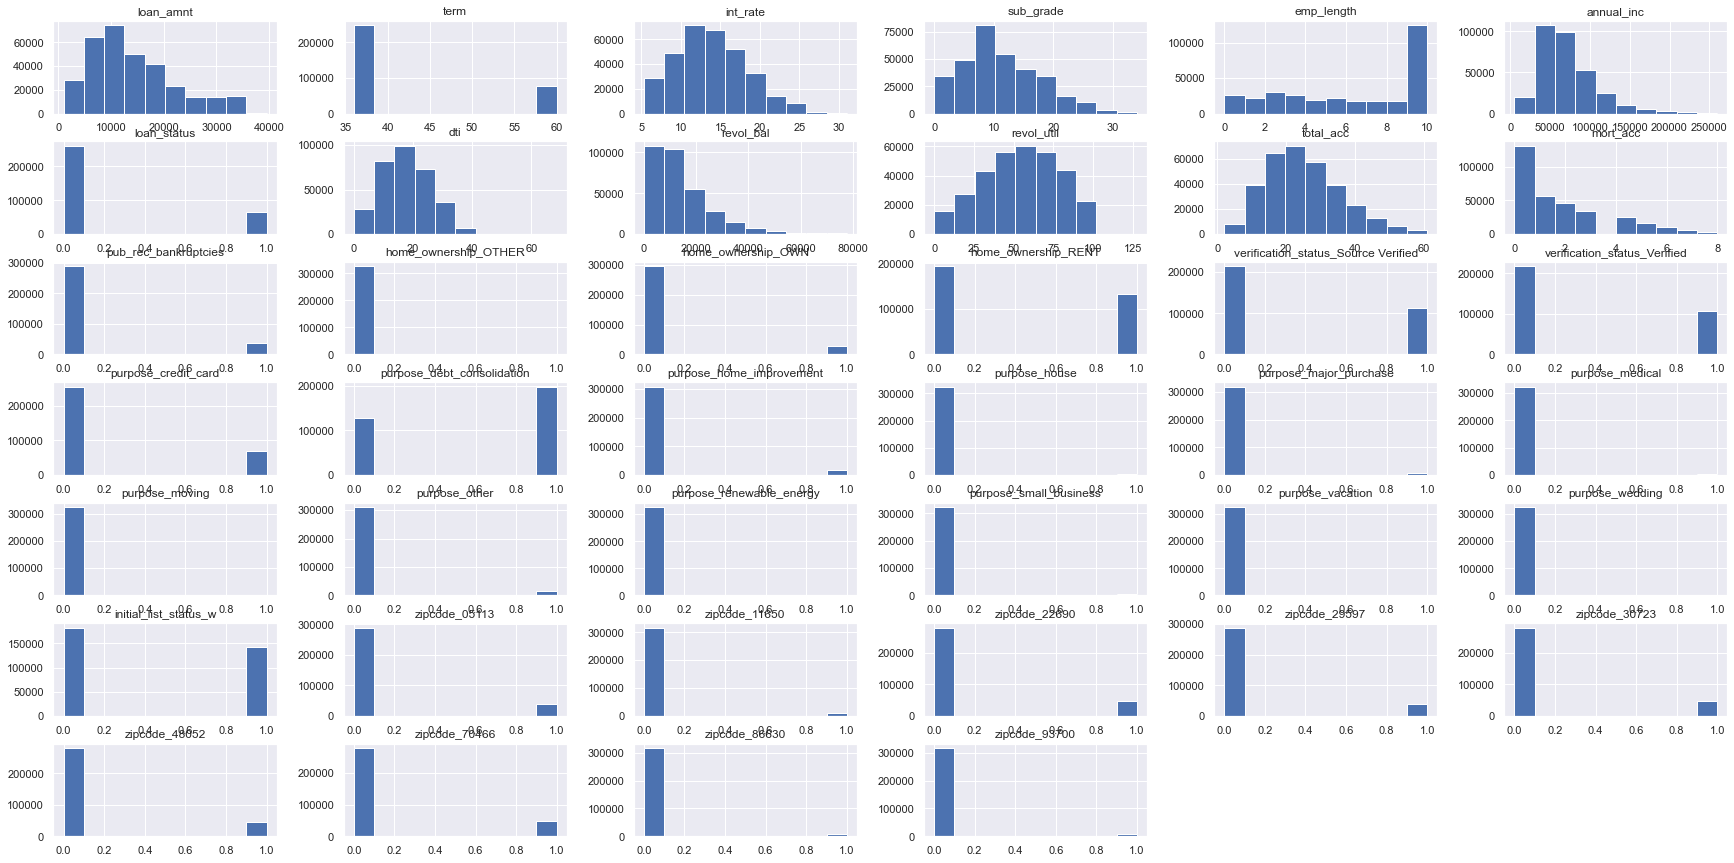

In [66]:
df3.hist()
plt.show()

In [67]:
#ax3 = sn.catplot(data=df2, x="loan_status", y="loan_amnt", kind="box",  palette=sn.color_palette(['#5B84B1FF', '#FC766AFF']))
#plt.title('Distribution of loan amount by loan status')

In [68]:
#sn.lmplot('revol_bal', 'loan_amnt', data=df2, hue='loan_status', fit_reg=False)
#plt.show()


## 5. Data split ##

In [69]:
X, y = df3.loc[:, df3.columns != 'loan_status'], df3['loan_status'] #define feature matrix X and labels y


In [70]:
# Detecting Multicollinearity with VIF
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                                feature         VIF
0                             loan_amnt    7.514829
1                                  term   26.014410
2                              int_rate  201.350540
3                             sub_grade   76.657295
4                            emp_length    3.964411
5                            annual_inc    8.194603
6                                   dti    7.895495
7                             revol_bal    4.431076
8                            revol_util    8.873995
9                             total_acc    8.643242
10                             mort_acc    2.846295
11                 pub_rec_bankruptcies    1.200836
12                 home_ownership_OTHER    1.000939
13                   home_ownership_OWN    1.247570
14                  home_ownership_RENT    2.527446
15  verification_status_Source Verified    2.250307
16         verification_status_Verified    2.398137
17                  purpose_credit_card   13.221343
18          

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) #split data 70:30

X_test_original = X_test.copy()


In [72]:
X_test_original.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,12000.0,60,12.29,10,10,72000.0,13.75,13855.0,61.6,23.0,...,1,0,0,0,0,1,0,0,0,0
221984,12000.0,60,12.99,11,10,95000.0,19.48,30656.0,63.5,30.0,...,1,1,0,0,0,0,0,0,0,0
166356,28000.0,60,13.98,12,10,75000.0,14.73,35188.0,54.4,21.0,...,0,0,0,0,0,0,0,0,0,0
133728,15000.0,36,10.15,6,6,75000.0,7.12,10246.0,29.4,28.0,...,1,0,0,1,0,0,0,0,0,0
277546,7500.0,36,10.64,6,7,76000.0,3.77,6829.0,39.7,19.0,...,1,0,0,0,1,0,0,0,0,0


In [73]:
X_train.drop("int_rate", axis=1, inplace=True) #high multicolinearity detected
X_test.drop("int_rate", axis=1, inplace=True) #high multicolinearity detected


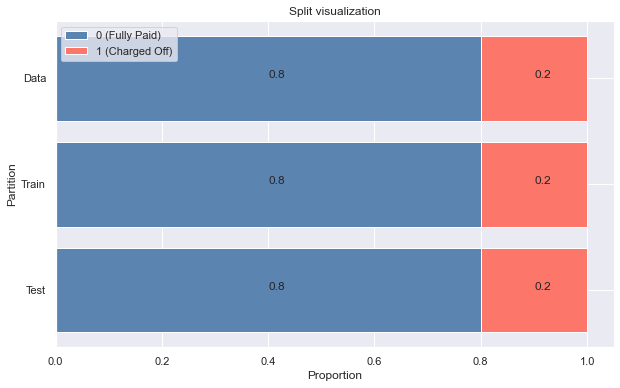

In [74]:

train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)


fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#5B84B1FF', label='0 (Fully Paid)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#FC766AFF', label='1 (Charged Off)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## 6. Data scaling

In [75]:
#scaled_features = df3.copy()
#col_names = ['loan_amnt', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
#features = scaled_features[col_names]
#scaler = StandardScaler().fit(features.values)
#features = scaler.transform(features.values)
#scaled_features[col_names] = features


In [76]:

from sklearn.preprocessing import RobustScaler

col_names = ['loan_amnt', 'annual_inc','dti','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
transformer = RobustScaler()
X_train[col_names]=transformer.fit_transform(X_train[col_names])
X_test[col_names]=transformer.transform(X_test[col_names])





In [77]:
X_train.head()

,loan_amnt,term,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,mort_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
151283,1.916667,36,5,9,1.250000,0.113288,1.119635,-0.025070,1.733333,0.333333,...,0,0,0,0,1,0,0,0,0,0
218497,1.500000,36,5,10,0.113636,-0.816865,0.341705,0.456825,-0.600000,0.666667,...,1,1,0,0,0,0,0,0,0,0
227536,1.916667,60,25,7,2.140909,0.183986,4.696575,0.325905,0.466667,0.000000,...,0,0,0,0,0,1,0,0,0,0
323619,-0.397917,36,7,2,0.181818,-1.366269,-0.634703,-1.356546,-1.133333,-0.333333,...,1,0,0,0,0,0,0,1,0,0
190977,-0.883333,36,12,2,-0.090909,0.278535,-0.545967,-0.089136,-0.200000,-0.333333,...,1,0,0,0,0,1,0,0,0,0


In [78]:
X_test.head()

,loan_amnt,term,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,mort_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,0.000000,60,10,10,0.159091,-0.299830,0.195129,0.175487,-0.066667,0.000000,...,1,0,0,0,0,1,0,0,0,0
221984,0.000000,60,11,10,0.681818,0.188245,1.473744,0.228412,0.400000,1.333333,...,1,1,0,0,0,0,0,0,0,0
166356,1.333333,60,12,10,0.227273,-0.216354,1.818645,-0.025070,-0.200000,-0.333333,...,0,0,0,0,0,0,0,0,0,0
133728,0.250000,36,6,6,0.227273,-0.864566,-0.079528,-0.721448,0.266667,0.000000,...,1,0,0,1,0,0,0,0,0,0
277546,-0.375000,36,6,7,0.250000,-1.149915,-0.339574,-0.434540,-0.333333,0.333333,...,1,0,0,0,1,0,0,0,0,0


In [79]:
X_test_original.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,12000.0,60,12.29,10,10,72000.0,13.75,13855.0,61.6,23.0,...,1,0,0,0,0,1,0,0,0,0
221984,12000.0,60,12.99,11,10,95000.0,19.48,30656.0,63.5,30.0,...,1,1,0,0,0,0,0,0,0,0
166356,28000.0,60,13.98,12,10,75000.0,14.73,35188.0,54.4,21.0,...,0,0,0,0,0,0,0,0,0,0
133728,15000.0,36,10.15,6,6,75000.0,7.12,10246.0,29.4,28.0,...,1,0,0,1,0,0,0,0,0,0
277546,7500.0,36,10.64,6,7,76000.0,3.77,6829.0,39.7,19.0,...,1,0,0,0,1,0,0,0,0,0


## 7. Data balancing ##

In [80]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train) #balance the training data



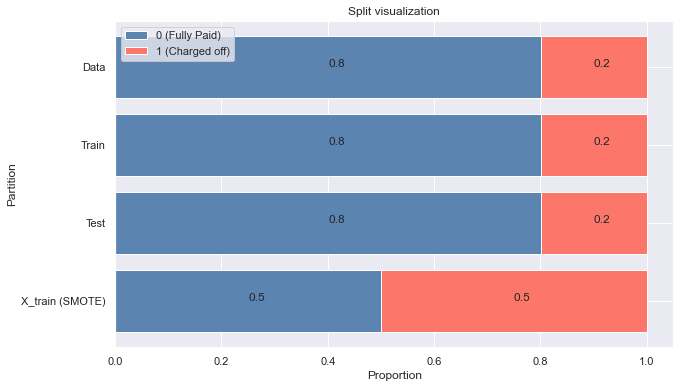

In [81]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#5B84B1FF', label='0 (Fully Paid)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#FC766AFF', label='1 (Charged off)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## 8. Model building

## Logistic regression with imbalanced data
##### Hyperparameter tuning

In [202]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l1', solver='liblinear')
results = log.fit(X_train, y_train)

In [203]:
#best_model = results.best_estimator_
y_pred = results.predict(X_test)
y_df = pd.DataFrame(y_test)
y_df['Predicted_status']=y_pred
y_df.head()

,loan_status,Predicted_status
181856,1,0
221984,0,0
166356,0,0
133728,0,0
277546,0,0


In [204]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  9289
False Positive(FP) =  888
True Negative(TN)  =  77460
False Negative(FN) =  10167


In [205]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.887


In [206]:
y_predProba_lr_imb = results.predict_proba(X_test)

In [207]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\ednur\AppData\Local\Temp/ipykernel_5068/2441991747.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


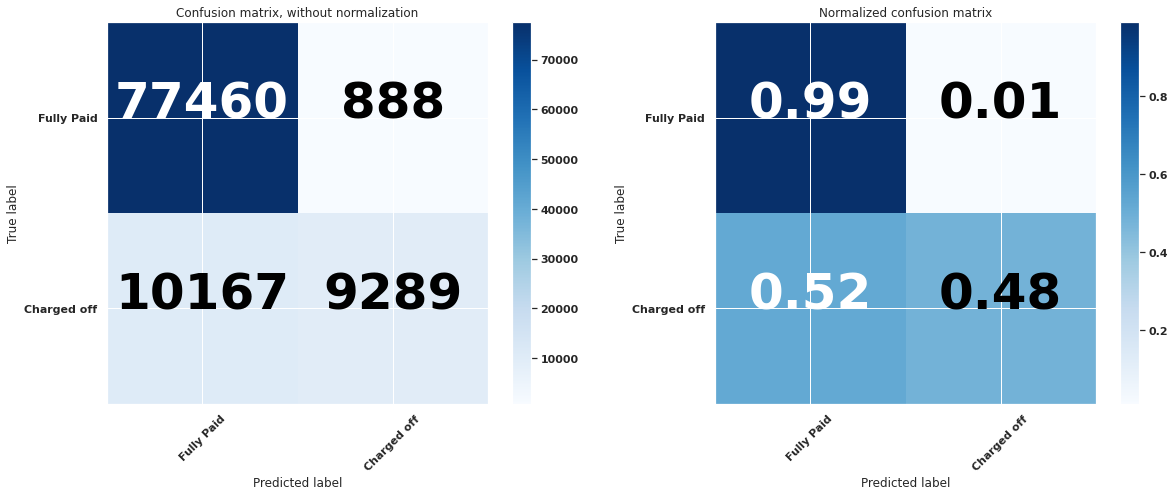

In [208]:
# Compute confusion matrix
class_names = ['Fully Paid', 'Charged off']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 8))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 50}
plt.rc('font', **font)

plt.show()

In [209]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.99      0.93     78348
           1       0.91      0.48      0.63     19456

    accuracy                           0.89     97804
   macro avg       0.90      0.73      0.78     97804
weighted avg       0.89      0.89      0.87     97804



In [210]:
new_df_imb = pd.concat([y_df, X_test_original],axis=1)


In [211]:
new_df_imb.head()

,loan_status,Predicted_status,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,1,0,12000.00,60,12.29,10,10,72000.00,13.75,13855.00,...,1,0,0,0,0,1,0,0,0,0
221984,0,0,12000.00,60,12.99,11,10,95000.00,19.48,30656.00,...,1,1,0,0,0,0,0,0,0,0
166356,0,0,28000.00,60,13.98,12,10,75000.00,14.73,35188.00,...,0,0,0,0,0,0,0,0,0,0
133728,0,0,15000.00,36,10.15,6,6,75000.00,7.12,10246.00,...,1,0,0,1,0,0,0,0,0,0
277546,0,0,7500.00,36,10.64,6,7,76000.00,3.77,6829.00,...,1,0,0,0,1,0,0,0,0,0


In [212]:
Losses_lg_imbal = new_df_imb.groupby(["loan_status",'Predicted_status']).agg({'loan_amnt':'sum'}).reset_index()
Losses_lg_imbal

,loan_status,Predicted_status,loan_amnt
0,0,0,1079186550.00
1,0,1,18272000.00
2,1,0,151237375.00
3,1,1,147383350.00


In [213]:
new_df_imb['benefit']=new_df_imb['loan_amnt']*(new_df_imb['int_rate']/100)
Benefit_lg_imbal = new_df_imb.groupby(["loan_status",'Predicted_status']).agg({'benefit':'sum'}).reset_index()

Benefit_lg_imbal

,loan_status,Predicted_status,benefit
0,0,0,144413142.74
1,0,1,4287565.03
2,1,0,23760080.55
3,1,1,25745919.32


In [214]:
expected_benefit_lg_imbal = Benefit_lg_imbal.iloc[0,2] - Losses_lg_imbal.iloc[2,2]
expected_benefit_lg_imbal

-6824232.262499988

### Logistic regression with balanced data
##### Hyperparameters tuning

In [215]:
log = LogisticRegression(penalty='l1', solver='liblinear')
results_2 = log.fit(X_sm, y_sm)

In [216]:
#best_model = results.best_estimator_
y_pred_2 = results_2.predict(X_test)
y_df_2 = pd.DataFrame(y_test)
y_df_2['Predicted_status']=y_pred_2
y_df_2.head()

,loan_status,Predicted_status
181856,1,0
221984,0,0
166356,0,1
133728,0,0
277546,0,0


In [217]:
y_pred_2


array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [218]:
y_predProba_lr_bal = results_2.predict_proba(X_test)

In [240]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     78348
           1       0.48      0.66      0.56     19456

    accuracy                           0.79     97804
   macro avg       0.70      0.74      0.71     97804
weighted avg       0.82      0.79      0.80     97804



In [219]:
#y_pred_2 = results_2.predict(X_test)
#X_test['Predicted_status']=y_pred_2


In [220]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_2)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred_2).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  12875
False Positive(FP) =  13788
True Negative(TN)  =  64560
False Negative(FN) =  6581


In [221]:
accuracy_2 =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy_2))

Accuracy of the binary classifier = 0.792


C:\Users\ednur\AppData\Local\Temp/ipykernel_5068/2441991747.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


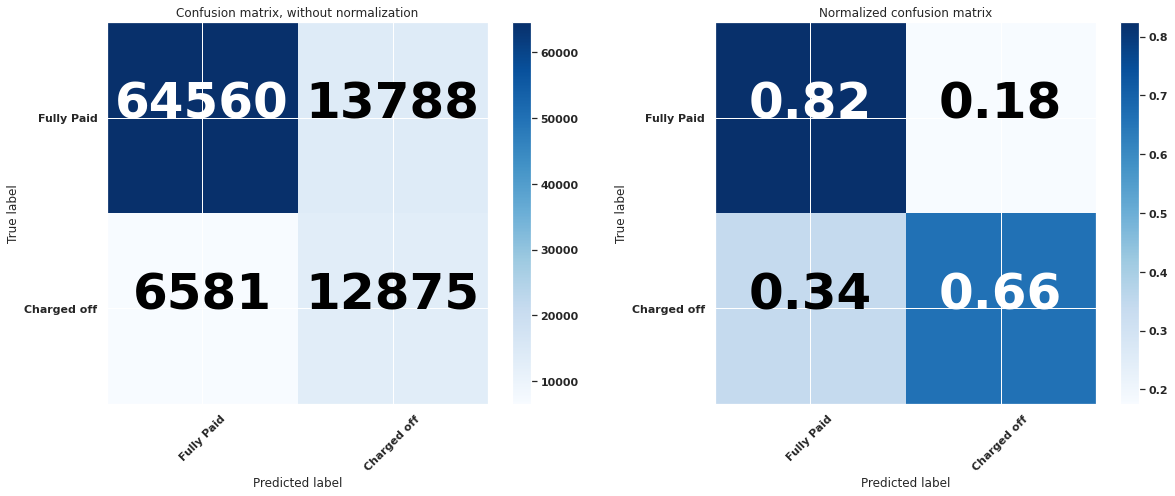

In [222]:
# Compute confusion matrix
class_names = ['Fully Paid', 'Charged off']
cnf_matrix = confusion_matrix(y_test, y_pred_2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 8))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 50}
plt.rc('font', **font)

plt.show()

In [223]:
y_predProba_lr_imb = results_2.predict_proba(X_test)

In [224]:
results_2

LogisticRegression(penalty='l1', solver='liblinear')

In [225]:
print(results_2.coef_, results_2.intercept_)

[[  0.3    0.02   0.08  -0.01  -0.24   0.38  -0.1    0.14  -0.04  -0.34
   -0.1   -1.15  -0.84  -0.28  -0.37  -0.6   -2.92  -2.7   -3.25  -3.99
   -3.59  -3.6   -3.63  -3.27  -4.26  -3.14  -4.01  -4.76  -0.38 -10.62
    9.44  -0.77 -10.64  -0.76  -0.72  -0.73   9.41   9.42]] [2.02]


<BarContainer object of 38 artists>

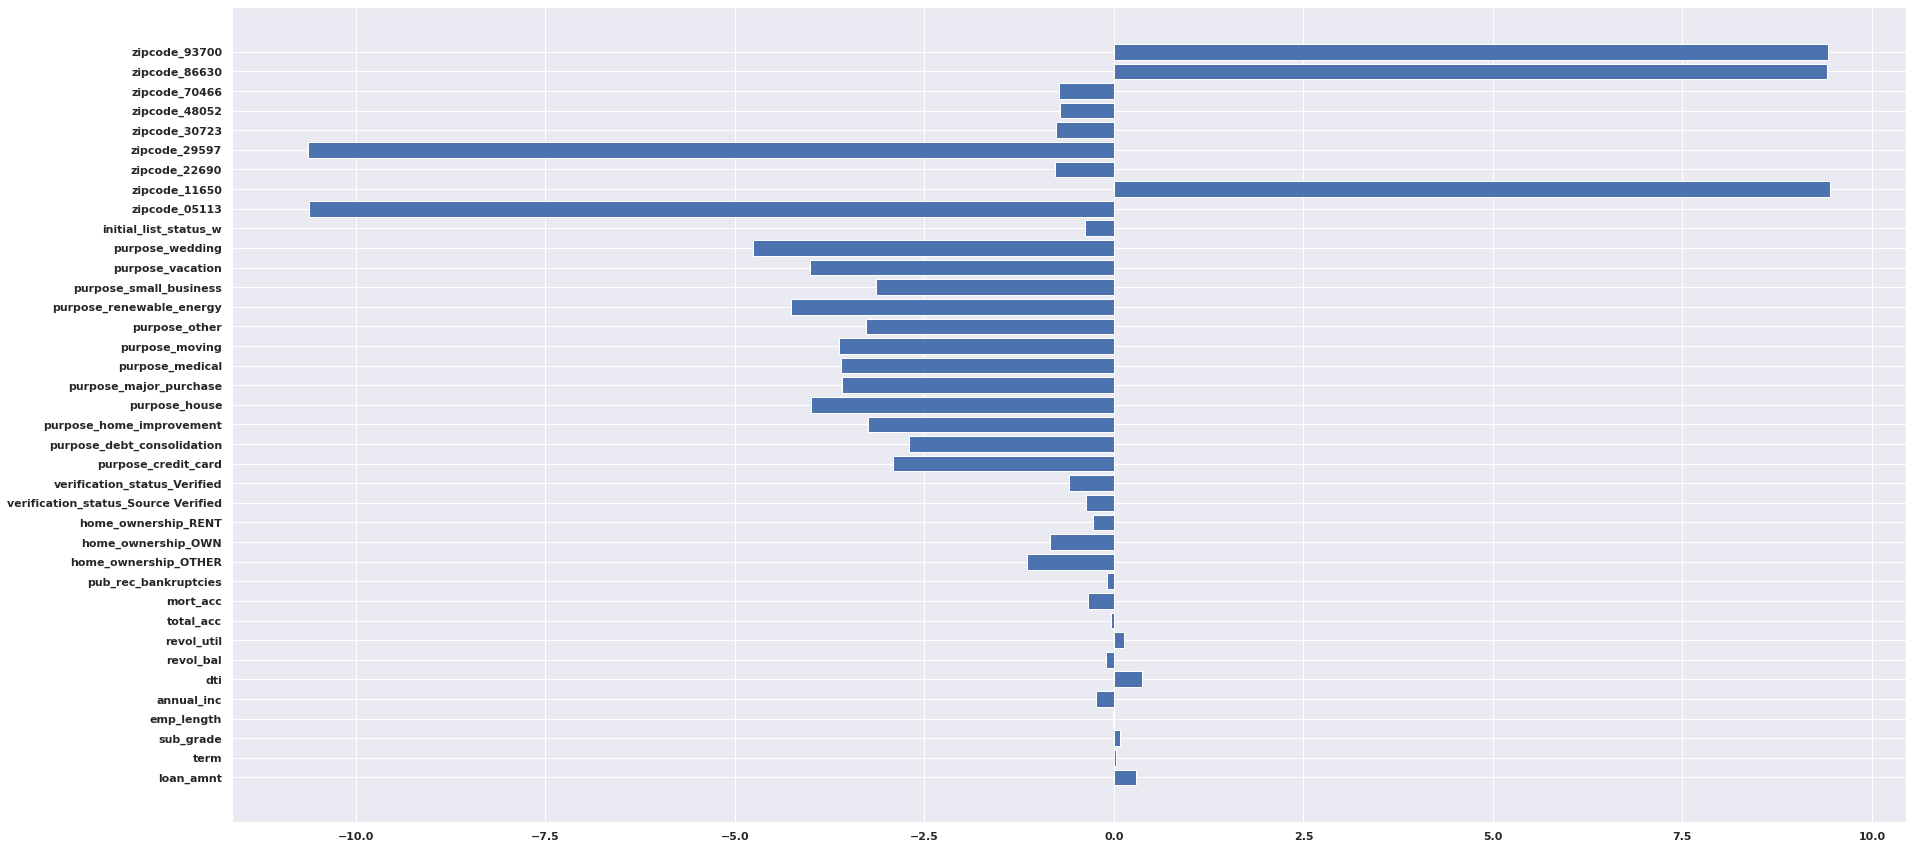

In [226]:
plt.barh(X_train.columns, results_2.coef_[0])


In [227]:
print('Coefficient of each feature:', results_2.coef_)


Coefficient of each feature: [[  0.3    0.02   0.08  -0.01  -0.24   0.38  -0.1    0.14  -0.04  -0.34
   -0.1   -1.15  -0.84  -0.28  -0.37  -0.6   -2.92  -2.7   -3.25  -3.99
   -3.59  -3.6   -3.63  -3.27  -4.26  -3.14  -4.01  -4.76  -0.38 -10.62
    9.44  -0.77 -10.64  -0.76  -0.72  -0.73   9.41   9.42]]


In [228]:
X_train.columns

Index(['loan_amnt', 'term', 'sub_grade', 'emp_length', 'annual_inc', 'dti',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'initial_list_status_w', 'zipcode_05113', 'zipcode_11650',
       'zipcode_22690', 'zipcode_29597', 'zipcode_30723', 'zipcode_48052',
       'zipcode_70466', 'zipcode_86630', 'zipcode_93700'],
      dtype='object')

In [229]:
new_df=pd.concat([y_df_2, X_test_original],axis=1)


In [230]:
X_test_original.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,...,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,12000.00,60,12.29,10,10,72000.00,13.75,13855.00,61.60,23.00,...,1,0,0,0,0,1,0,0,0,0
221984,12000.00,60,12.99,11,10,95000.00,19.48,30656.00,63.50,30.00,...,1,1,0,0,0,0,0,0,0,0
166356,28000.00,60,13.98,12,10,75000.00,14.73,35188.00,54.40,21.00,...,0,0,0,0,0,0,0,0,0,0
133728,15000.00,36,10.15,6,6,75000.00,7.12,10246.00,29.40,28.00,...,1,0,0,1,0,0,0,0,0,0
277546,7500.00,36,10.64,6,7,76000.00,3.77,6829.00,39.70,19.00,...,1,0,0,0,1,0,0,0,0,0


In [231]:
new_df.head().style

,loan_status,Predicted_status,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,zipcode_05113,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700
181856,1,0,12000.000000,60,12.290000,10,10,72000.000000,13.750000,13855.000000,61.600000,23.000000,1.000000,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
221984,0,0,12000.000000,60,12.990000,11,10,95000.000000,19.480000,30656.000000,63.500000,30.000000,5.000000,0.000000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
166356,0,1,28000.000000,60,13.980000,12,10,75000.000000,14.730000,35188.000000,54.400000,21.000000,0.000000,0.000000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133728,0,0,15000.000000,36,10.150000,6,6,75000.000000,7.120000,10246.000000,29.400000,28.000000,1.000000,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
277546,0,0,7500.000000,36,10.640000,6,7,76000.000000,3.770000,6829.000000,39.700000,19.000000,2.000000,1.000000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [232]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97804 entries, 181856 to 304435
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_status                          97804 non-null  int64  
 1   Predicted_status                     97804 non-null  int64  
 2   loan_amnt                            97804 non-null  float64
 3   term                                 97804 non-null  int32  
 4   int_rate                             97804 non-null  float64
 5   sub_grade                            97804 non-null  int8   
 6   emp_length                           97804 non-null  int32  
 7   annual_inc                           97804 non-null  float64
 8   dti                                  97804 non-null  float64
 9   revol_bal                            97804 non-null  float64
 10  revol_util                           97804 non-null  float64
 11  total_acc             

In [233]:
Losses_lg_bal = new_df.groupby(["loan_status",'Predicted_status']).agg({'loan_amnt':'sum'}).reset_index()


In [234]:
print(Losses_lg_bal)

   loan_status  Predicted_status    loan_amnt
0            0                 0 877238075.00
1            0                 1 220220475.00
2            1                 0  90245200.00
3            1                 1 208375525.00


In [235]:
new_df['benefit']=new_df['loan_amnt']*(new_df['int_rate']/100)

In [236]:
pd.set_option('float_format', '{:.2f}'.format)



In [237]:
Benefit_lg_bal = new_df.groupby(["loan_status",'Predicted_status']).agg({'benefit':'sum'}).reset_index()

In [238]:
Benefit_lg_bal

,loan_status,Predicted_status,benefit
0,0,0,109992974.19
1,0,1,38707733.58
2,1,0,12647054.83
3,1,1,36858945.03


In [239]:
expected_benefit_lg_bal = Benefit_lg_bal.iloc[0,2] - Losses_lg_bal.iloc[2,2]
expected_benefit_lg_bal


19747774.189999998

### Decision tree with balanced data

In [241]:
from scipy.stats import randint


param_dist = {"max_depth": [3,4,5],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring='recall')



# Fit it to the data
tree_cv.fit(X_sm,y_sm)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AA21B60A60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AA21B7A370>},
                   scoring='recall')

In [242]:
print('Best Score: %s' % tree_cv.best_score_)
print('Best Hyperparameters: %s' % tree_cv.best_params_)

Best Score: 0.7756312883738261
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 3}


In [243]:
dctree = DecisionTreeClassifier(**tree_cv.best_params_,random_state=42)
dt_model = dctree.fit(X_sm,y_sm)


In [244]:
y_predProba_dt = dt_model.predict_proba(X_test)

In [245]:
accuracy_score(y_sm, dt_model.predict(X_sm))

0.6952413778011205

In [246]:
y_pred_clf = dt_model.predict(X_test)
y_pred_clf_probs = dt_model.predict_proba(X_test)

print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74     78348
           1       0.33      0.76      0.46     19456

    accuracy                           0.65     97804
   macro avg       0.62      0.69      0.60     97804
weighted avg       0.80      0.65      0.68     97804



In [247]:
y_pred_clf

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

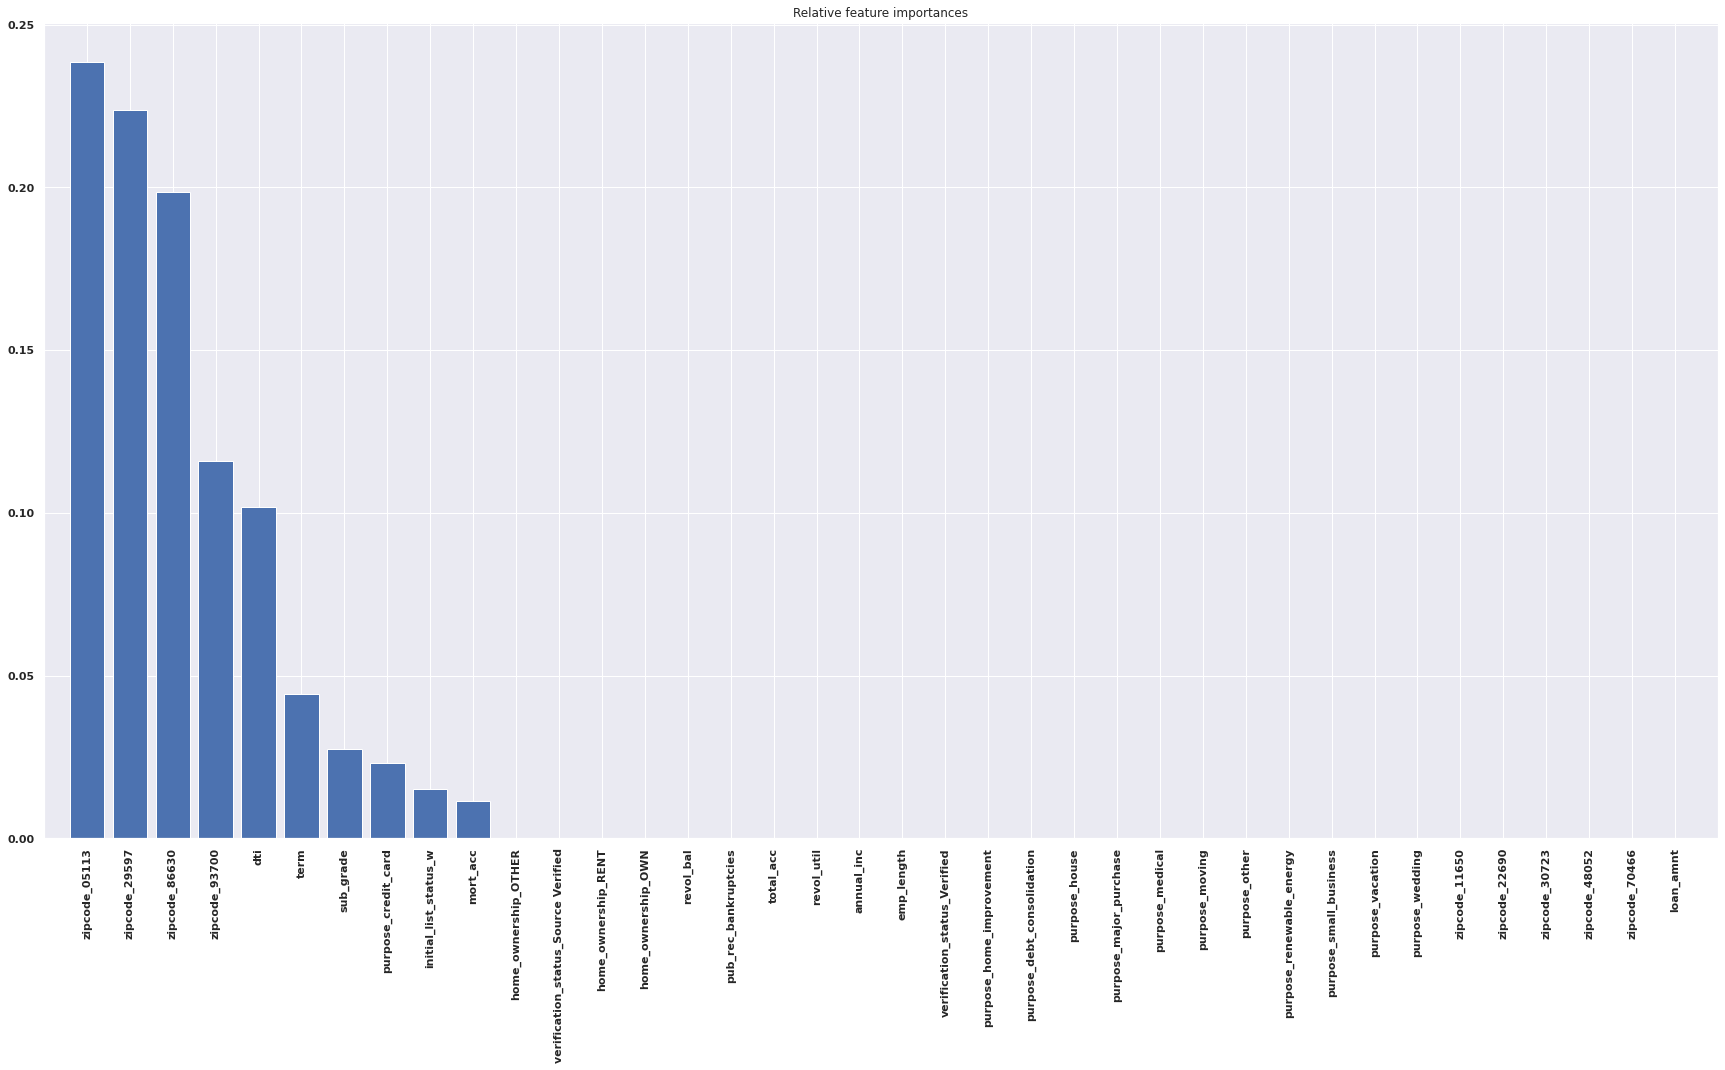

In [248]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X_sm.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X_sm.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X_sm.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X_sm.shape[1]])
plt.show()


In [249]:
new_df_dt = X_test_original.copy()
new_df_dt['Predicted']=y_pred_clf
new_df_dt['Actual']=y_test

new_df_dt

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,...,zipcode_11650,zipcode_22690,zipcode_29597,zipcode_30723,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,Predicted,Actual
181856,12000.00,60,12.29,10,10,72000.00,13.75,13855.00,61.60,23.00,...,0,0,0,1,0,0,0,0,0,1
221984,12000.00,60,12.99,11,10,95000.00,19.48,30656.00,63.50,30.00,...,0,0,0,0,0,0,0,0,0,0
166356,28000.00,60,13.98,12,10,75000.00,14.73,35188.00,54.40,21.00,...,0,0,0,0,0,0,0,0,1,0
133728,15000.00,36,10.15,6,6,75000.00,7.12,10246.00,29.40,28.00,...,0,1,0,0,0,0,0,0,0,0
277546,7500.00,36,10.64,6,7,76000.00,3.77,6829.00,39.70,19.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219708,9450.00,36,14.09,9,9,28000.00,18.56,10804.00,77.20,18.00,...,0,0,0,0,1,0,0,0,0,0
157448,5000.00,36,8.90,4,2,28000.00,1.29,1690.00,21.70,6.00,...,0,0,0,1,0,0,0,0,0,0
61315,18000.00,36,10.99,8,9,80000.00,17.40,17350.00,73.50,34.00,...,0,0,1,0,0,0,0,0,0,0
379891,12400.00,36,14.65,14,0,47404.00,22.68,130.00,26.00,23.00,...,0,0,0,0,0,1,0,0,1,0


In [250]:
Losses_dt_bal = new_df_dt.groupby(["Actual",'Predicted']).agg({'loan_amnt':'sum'}).reset_index()
Losses_dt_bal


,Actual,Predicted,loan_amnt
0,0,0,653852150.00
1,0,1,443606400.00
2,1,0,65159300.00
3,1,1,233461425.00


In [251]:
new_df_dt['benefit']=new_df_dt['loan_amnt']*(new_df_dt['int_rate']/100)
Benefit_dt_bal = new_df_dt.groupby(["Actual",'Predicted']).agg({'benefit':'sum'}).reset_index()
Benefit_dt_bal

,Actual,Predicted,benefit
0,0,0,81962631.14
1,0,1,66738076.62
2,1,0,9292971.68
3,1,1,40213028.19


In [252]:
expected_benefit_dt_bal = Benefit_dt_bal.iloc[0,2] - Losses_dt_bal.iloc[2,2]
expected_benefit_dt_bal


16803331.144999996

C:\Users\ednur\AppData\Local\Temp/ipykernel_5068/2441991747.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


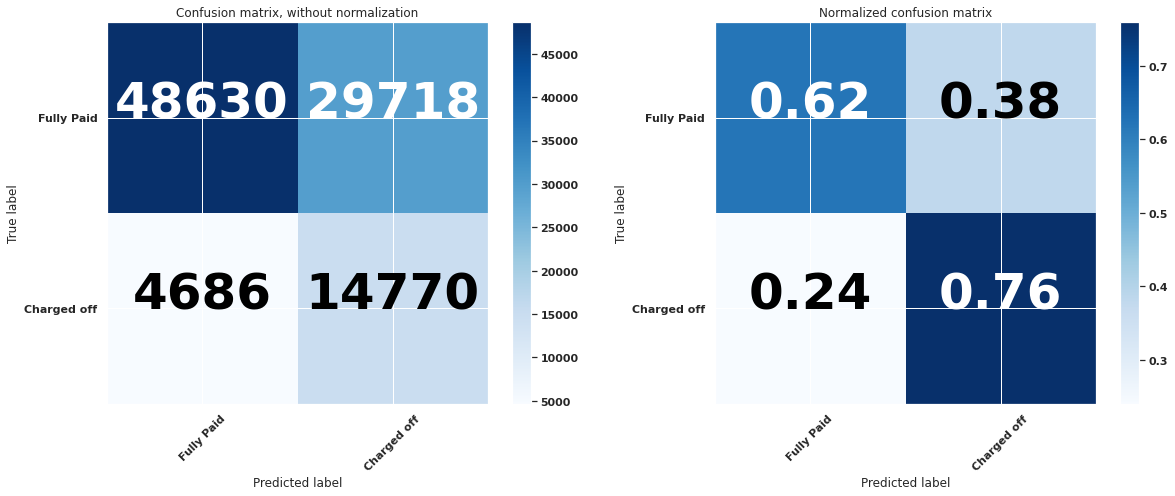

In [253]:
# Compute confusion matrix
class_names = ['Fully Paid', 'Charged off']
cnf_matrix = confusion_matrix(y_test, y_pred_clf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(18, 8))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 50}
plt.rc('font', **font)

plt.show()

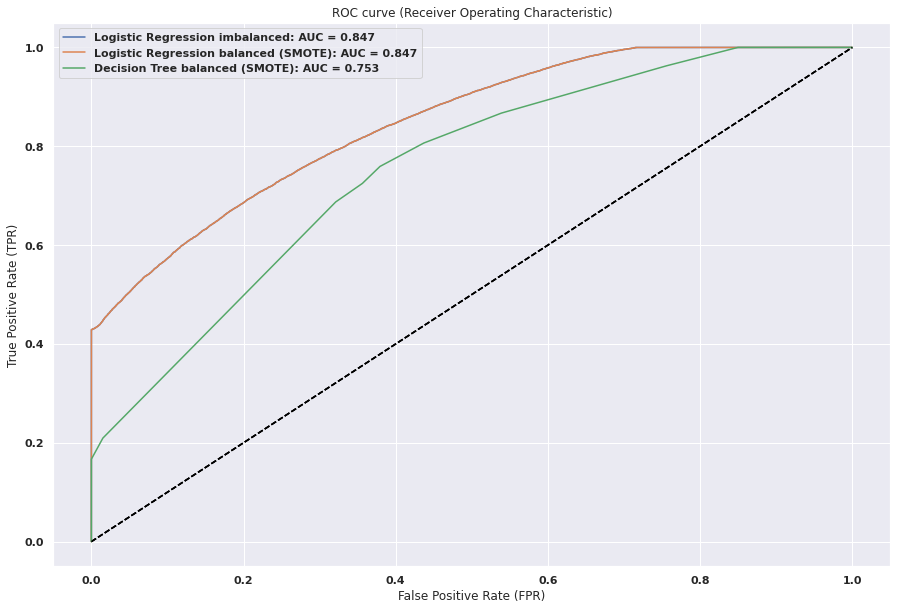

In [254]:
## logistic reg imbalanced, log reg balanced, decision tree

plt.figure(figsize=(15,10))

for test, pred, name in zip([y_test, y_test, y_test], [y_predProba_lr_imb[:,1], y_predProba_lr_bal[:,1], y_predProba_dt[:,1]], ['Logistic Regression imbalanced', 'Logistic Regression balanced (SMOTE)','Decision Tree balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

